In [1]:
import sys
sys.path.append('src')

import pandas as pd
import time
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

from src import SABR
from src.SABR_IV_approximators import Hagan, AntonovANN
import helperfunctions as hf
from src.classes import DataImporter

data_importer = DataImporter()

# Calibrate SPX to Hagan

In [2]:
dates = data_importer.data['date'].unique()

In [3]:
def get_SPX_params(approximator, day, min_day, max_day):
    params = pd.DataFrame(columns=['alpha', 'rho', 'v', 'days', 'count', 'delta', 'vega'])
    count = 0
    for date in dates:
        print(str(pd.to_datetime(date).strftime('%Y-%m-%d - ')) + str(count / len(dates)))
        
        smile = data_importer.smile_days_range(date, min_day, max_day, extra_cols=['volume']) # imports smile with maturity as close as possible

        if len(smile) < 5:
            continue

        try:
            smile['strike'] = smile['strike_price'] / smile['forward_price']
            F = smile['forward_price'][0]
            T = smile['T'][0]
            S = smile['spot'][0]
            r = np.log(F/S) / T
            calibrate = SABR.calibrate_smile(smile, approximator) # calibrate smile using Hagan IV approximator
            
            alpha, rho, v = calibrate[0].x
            delta = SABR.delta_spx(approximator, alpha, .5, rho, v, (S/F,1), T, S/F, r=r)
            vega = SABR.vega(approximator, alpha, .5, rho, v, (S/F,1), T) * np.sqrt(F)
                       
            
            select = list(calibrate[0].x) + [smile['days'][0], len(smile), delta, vega]
            params.loc[date] = select
        except Exception as e:
            print('==== Error for ' + str(e))

        count += 1
        
    return params

## 30d to maturity, used for results

In [7]:
day = 30
min_day = 25
max_day = 35
spx_hagan = get_SPX_params(Hagan(), day, min_day, max_day)
spx_ann = get_SPX_params(AntonovANN(), day, min_day, max_day)

2010-01-04 - 0.0
No data for this range
2010-01-05 - 0.0
No data for this range
2010-01-06 - 0.0
No data for this range
2010-01-07 - 0.0
No data for this range
2010-01-08 - 0.0
No data for this range
2010-01-11 - 0.0
No data for this range
2010-01-12 - 0.0
No data for this range
2010-01-13 - 0.0
No data for this range
2010-01-14 - 0.0
No data for this range
2010-01-15 - 0.0
No data for this range
2010-01-19 - 0.0
iv: 0.14057472116186237
0.4937072992900384
0.4937072992900395
dF: 0.6524118489341368
0.0011828943088411747
0.0011810943489223634
1.0358867603356414
2010-01-20 - 0.00036114120621162876
iv: 0.155287918164702
0.4960243323560713
0.4960243323560713
dF: 0.611625120689463
0.001164296292972015
0.0011625801795922088
1.0226886224433407
2010-01-21 - 0.0007222824124232575
iv: 0.18249026254943074
0.4995779657238346
0.4995779657238338
dF: 0.7488507103085851
0.0011453611073690161
0.00114373133033583
1.0192460104645196
2010-01-22 - 0.0010834236186348862
iv: 0.23103115395117788
0.5045810467545

iv: 0.2504240032455331
0.5073200740124383
0.507320074012439
dF: 1.0167232755622924
0.0012010984746239723
0.0011993542744739513
1.0038143712307046
2010-05-18 - 0.010473094980137234
iv: 0.26572831677034986
0.5085363939010821
0.5085363939010827
dF: 1.0902094194767398
0.001182639109830805
0.0011809708701853278
1.014479753795594
2010-05-19 - 0.010834236186348862
iv: 0.28033282438185003
0.509633991885568
0.5096339918855675
dF: 0.8669193907151485
0.0011638855159301102
0.001162298889686981
1.0057742126512448
2010-05-20 - 0.01119537739256049
iv: 0.39310471503206323
0.5177795706549944
0.517779570654994
dF: 1.09534453390292
0.0011441123507191907
0.00114259594350588
0.9842159801376482
2010-05-21 - 0.01155651859877212
iv: 0.3219949019632768
0.5124757737250415
0.5124757737250415
dF: 1.062968791994412
0.00112539796670103
0.0011239583162068812
1.0003941124053783
2010-05-24 - 0.011917659804983749
iv: 0.31832509538061193
0.5115636418273539
0.5115636418273545
dF: 0.8501088640092136
0.0010655296897370194


2010-09-07 - 0.022029613578909354
No data for this range
2010-09-08 - 0.022029613578909354
No data for this range
2010-09-09 - 0.022029613578909354
No data for this range
2010-09-10 - 0.022029613578909354
No data for this range
2010-09-13 - 0.022029613578909354
iv: 0.1877091205679053
0.4995070920869979
0.49950709208699706
dF: 0.7937953802125697
0.0012015512589449836
0.0011995552948150425
1.0087283495449628
2010-09-14 - 0.02239075478512098
iv: 0.19318252153576648
0.5001825910719306
0.5001825910719306
dF: 1.0428918532125186
0.001183144201808366
0.0011812411758982384
1.0137624931785827
2010-09-15 - 0.02275189599133261
iv: 0.18951519253845053
0.499772103476366
0.4997721034763652
dF: 0.7166738138916773
0.0011644490688790007
0.0011626377220888306
1.0237732335219296
2010-09-16 - 0.02311303719754424
iv: 0.18683546441711765
0.499473271139745
0.499473271139745
dF: 0.9028517771485223
0.0011454539003853393
0.0011437309734278524
1.0205359171709671
2010-09-17 - 0.023474178403755867
iv: 0.16757855505

No data for this range
2011-01-06 - 0.03214156735283496
No data for this range
2011-01-07 - 0.03214156735283496
No data for this range
2011-01-10 - 0.03214156735283496
No data for this range
2011-01-11 - 0.03214156735283496
No data for this range
2011-01-12 - 0.03214156735283496
No data for this range
2011-01-13 - 0.03214156735283496
No data for this range
2011-01-14 - 0.03214156735283496
No data for this range
2011-01-18 - 0.03214156735283496
iv: 0.13154525223227753
0.49263690752906836
0.4926369075290672
dF: 0.7344993542751643
0.0011827863259066904
0.0011810401026977134
1.0352987682527015
2011-01-19 - 0.032502708559046585
iv: 0.1439362792131849
0.4947731740662776
0.49477317406627863
dF: 0.43610723929554673
0.0011642010311568138
0.0011625381241754619
1.0260662985615843
2011-01-20 - 0.03286384976525822
iv: 0.1480071514575296
0.4954789202979282
0.4954789202979272
dF: 0.5876344378792642
0.001145239161125197
0.001143658525172913
1.0193022251087092
2011-01-21 - 0.033224990971469845
iv: 0.14

iv: 0.15458893569976118
0.4958103710367001
0.4958103710367001
dF: 0.7191478223747549
0.0012013729002519826
0.001199490061055294
1.013836759142378
2011-05-17 - 0.04225352112676056
iv: 0.14779504454598813
0.49486459415912054
0.49486459415912154
dF: 0.6575158960195338
0.0011829411404031028
0.001181143430872092
1.015198405537182
2011-05-18 - 0.04261466233297219
iv: 0.12884630674166064
0.49184828949162007
0.49184828949162007
dF: 0.8505465719095551
0.0011641078547080812
0.0011623951910086417
1.037429301881665
2011-05-19 - 0.04297580353918382
iv: 0.1285260713685217
0.49193838228641784
0.49193838228641906
dF: 0.8023329396383838
0.001145127377148223
0.0011434984453570943
1.0223086348713772
2011-05-20 - 0.04333694474539545
iv: 0.14014410771490002
0.49399822480661765
0.49399822480661765
dF: 1.173264008135222
0.0011259275329111357
0.0011243809585981376
1.0172640898986618
2011-05-23 - 0.043698085951607075
iv: 0.1383938298134928
0.494122511946252
0.494122511946252
dF: 1.6431121533419524
0.0010659473

No data for this range
2011-09-09 - 0.053810039725532686
No data for this range
2011-09-12 - 0.053810039725532686
No data for this range
2011-09-13 - 0.053810039725532686
No data for this range
2011-09-14 - 0.053810039725532686
No data for this range
2011-09-15 - 0.053810039725532686
No data for this range
2011-09-16 - 0.053810039725532686
No data for this range
2011-09-19 - 0.053810039725532686
iv: 0.29284216983172495
0.5105196104373727
0.5105196104373733
dF: 0.7251212958675479
0.001201004723412744
0.0011991391538457505
0.9918041661363675
2011-09-20 - 0.05417118093174431
iv: 0.29830508829600416
0.5108082895152117
0.5108082895152123
dF: 1.0307131735032282
0.0011825891655532193
0.00118080775979129
0.9909977842720297
2011-09-21 - 0.05453232213795594
iv: 0.3324059379231897
0.5133264510127451
0.5133264510127451
dF: 0.9555820365353407
0.0011636818087410194
0.001161989182120793
0.9896379930593446
2011-09-22 - 0.05489346334416757
iv: 0.37976600765107854
0.5165538561502773
0.5165538561502769
d

iv: 0.1868380137693576
0.49861279982907536
0.4986127998290745
dF: 0.7124293473952104
0.0011832707026019807
0.0011812341584861296
1.0094708181454526
2012-01-18 - 0.06428313470566992
iv: 0.16552399065627885
0.4957934893896995
0.4957934893897004
dF: 0.7413666953108577
0.0011645188809974727
0.0011625732805698185
1.0197448446237767
2012-01-19 - 0.06464427591188154
iv: 0.16167714260320779
0.495311717677162
0.49531171767716103
dF: 0.6179555836348383
0.0011455060087589629
0.0011436529922272374
1.0173083201346633
2012-01-20 - 0.06500541711809317
iv: 0.14288827055733766
0.4924891246784272
0.4924891246784261
dF: 0.6218733549660793
0.0011260748064289036
0.001124308915542178
1.0311044860775165
2012-01-23 - 0.0653665583243048
iv: 0.14975731005468654
0.4939740110882227
0.4939740110882216
dF: 0.9276954371008339
0.0010661292874359493
0.0010646350497204742
1.0338612535791547
2012-01-24 - 0.06572769953051644
No data for this range
2012-01-25 - 0.06572769953051644
No data for this range
2012-01-26 - 0.065

iv: 0.22076214685900217
0.50239641801261
0.50239641801261
dF: 1.1041990512580813
0.0011455686991570055
0.0011437113355050748
1.0064197332314284
2012-05-18 - 0.07511737089201878
iv: 0.20901939305648926
0.5011682379746838
0.5011682379746846
dF: 0.6288652680538909
0.0011262624412281576
0.0011245033937226888
1.0142891653898423
2012-05-21 - 0.07547851209823041
iv: 0.18813571585691227
0.4989463106386098
0.4989463106386098
dF: 0.8015874459978145
0.0010662373238545502
0.0010647528047584777
1.0185901615064608
2012-05-22 - 0.07583965330444203
No data for this range
2012-05-23 - 0.07583965330444203
No data for this range
2012-05-24 - 0.07583965330444203
No data for this range
2012-05-25 - 0.07583965330444203
No data for this range
2012-05-29 - 0.07583965330444203
iv: 0.18112220520006875
0.497192716213746
0.497192716213746
dF: 0.6725873803620219
0.0011646624049929508
0.00116260912662113
1.0064969025813664
2012-05-30 - 0.07620079451065366
iv: 0.21390720003159433
0.5011092100526654
0.501109210052664

iv: 0.134281647259157
0.4889592316987088
0.4889592316987088
dF: 0.3621209169392403
0.001106429461526081
0.0011045268847075837
1.014347936281329
2012-08-06 - 0.09100758396533044
iv: 0.14070302527686535
0.4898132697684609
0.48981326976846196
dF: 0.5912116334789996
0.001183139499814204
0.0011808561923608257
1.0170341779341951
2012-08-07 - 0.09136872517154207
iv: 0.13877817255855487
0.48958868259200505
0.48958868259200505
dF: 0.3699500181725268
0.0011644214336396822
0.001162241970877962
1.0087518595278122
2012-08-08 - 0.0917298663777537
iv: 0.13123228090824549
0.4874890721936426
0.4874890721936426
dF: 0.46918955424801734
0.0011453296434320557
0.0011431695140418443
1.0153939298931935
2012-08-09 - 0.09209100758396534
No strikes under ATM
iv: 0.12914150704263885
0.48730955818622934
0.48730955818623056
dF: 0.5981107672113628
0.0011259874082843655
0.0011239392277887172
1.0178151218431797
2012-08-10 - 0.09245214879017696
iv: 0.1244375684862726
0.48634441482587687
0.4863444148258782
dF: 0.6178800

iv: 0.14545703523222706
0.49129110714378227
0.4912911071437833
dF: 0.6461690391108832
0.0011454965000340979
0.0011434594384625307
1.0122706624815514
2012-10-11 - 0.10762007945106537
iv: 0.14772129461250988
0.491935052155887
0.49193505215588806
dF: 0.7693781497720986
0.00112620112214222
0.0011242784255194574
1.0115588110250207
2012-10-12 - 0.107981220657277
iv: 0.14654531892773
0.4919270972952185
0.4919270972952174
dF: 0.7853472885348267
0.0011065427159765995
0.0011047238199327254
1.0114528496099617
2012-10-15 - 0.10834236186348863
iv: 0.1349382015986542
0.49025564884302014
0.4902556488430191
dF: 0.7611763335410582
0.001201375980694357
0.0011991983629604714
1.0233868730417928
2012-10-16 - 0.10870350306970025
iv: 0.13211197488321313
0.4899631176859828
0.4899631176859828
dF: 0.6890697483737107
0.0011829349836904376
0.001180867439561809
1.024649773418429
2012-10-17 - 0.10906464427591188
iv: 0.12337150066091004
0.48840599501463877
0.48840599501463877
dF: 0.5853674325279057
0.001164114210851

iv: 0.14998451314110742
0.4935279902088644
0.49352799020886334
dF: 1.216512680851517
0.0011261375995134744
0.0011243602360548504
1.0218600635589214
2012-12-24 - 0.12387143373058866
iv: 0.1589303412122557
0.49522027018196546
0.49522027018196546
dF: 1.1683029268537426
0.0010661800623688667
0.0010646800977327222
1.0168051810373335
2012-12-26 - 0.12423257493680029
iv: 0.1747902085101037
0.49605691067859103
0.4960569106785919
dF: 0.9666834225013909
0.0011456802540278936
0.0011436761038931891
1.0049839031524288
2012-12-27 - 0.12459371614301191
iv: 0.17803264262110347
0.4965549035386361
0.49655490353863524
dF: 1.346545499018581
0.0011263710578584144
0.0011244662858128666
1.014488413334097
2012-12-28 - 0.12495485734922354
iv: 0.20152025364581994
0.49937962349560294
0.4993796234956037
dF: 0.8974128690505956
0.001106767255946366
0.0011049487225815407
1.0015437378786685
2012-12-31 - 0.12531599855543518
iv: 0.15897747258563585
0.49351971728422434
0.49351971728422434
dF: 0.6436142999681482
0.001183

2013-03-05 - 0.14084507042253522
iv: 0.10795089997335722
0.4842622632391689
0.4842622632391703
dF: 0.640663092529789
0.001163751962286722
0.0011617331479311487
1.0067320777654847
2013-03-06 - 0.14120621162874683
iv: 0.10570042869917617
0.48396791022421953
0.483967910224221
dF: 1.1154709989639326
0.0011447267051888413
0.0011428083087580744
1.040187649865784
2013-03-07 - 0.14156735283495847
iv: 0.1150520889179768
0.48664254761717096
0.48664254761716963
dF: 1.1618805941033399
0.001125690858229038
0.00112387783815307
1.0145358676375005
2013-03-08 - 0.1419284940411701
iv: 0.10093835332117526
0.4834669057491242
0.48346690574912266
dF: 0.9430856963697776
0.0011057132888077517
0.0011040010656292202
1.0275213890503787
2013-03-11 - 0.14228963524738172
iv: 0.1037471478982615
0.4834946679241986
0.48349466792420004
dF: 0.9252144370723581
0.0011822892512742492
0.001180230188242947
1.0247482219115367
2013-03-12 - 0.14265077645359336
iv: 0.10736968249492758
0.4848412926816691
0.4848412926816677
dF: 0.

iv: 0.10531308187101847
0.4850582708684224
0.4850582708684209
dF: 0.49338919417871163
0.0011254655198336026
0.0011237194185943942
1.0188754386901422
2013-05-10 - 0.15781870711448176
iv: 0.0980651104215564
0.4834329837937526
0.4834329837937542
dF: 0.46261477579488675
0.0011056512149012756
0.001103997166860525
1.0205699016906793
2013-05-13 - 0.1581798483206934
iv: 0.11341428582162599
0.48645349290218176
0.4864534929021831
dF: 0.5028242989785908
0.0011825740479188553
0.0011805602403773157
1.0161981239460716
2013-05-14 - 0.158540989526905
iv: 0.1130431695341862
0.4866538546949264
0.4866538546949264
dF: 0.43472732719519736
0.001163900275139156
0.0011619872630944461
1.0254353104075657
2013-05-15 - 0.15890213073311665
iv: 0.11259066763409287
0.48685945361456373
0.4868594536145651
dF: 0.6321532024018001
0.0011449240116064242
0.0011431114725085868
1.0390729982698992
2013-05-16 - 0.15926327193932827
iv: 0.11696655266560059
0.48809853259606434
0.48809853259606434
dF: 0.7106040702862387
0.00112572

iv: 0.12070444737218045
0.4903810468867472
0.49038104688674594
dF: 0.47425410125832845
0.001164006228747832
0.0011622999473469304
1.0309236454830033
2013-07-18 - 0.1747923438064283
iv: 0.12038910840355306
0.4905198339395631
0.4905198339395644
dF: 0.276785631282625
0.0011450291017158574
0.0011434090268841292
1.0214043919936493
2013-07-19 - 0.17515348501263994
iv: 0.10604255281220495
0.48767999873823464
0.48767999873823614
dF: 0.28701239228254294
0.001125512786539757
0.0011239719636346758
1.0332598825511796
2013-07-22 - 0.17551462621885158
iv: 0.10098275225334215
0.4872605900849811
0.4872605900849811
dF: 0.21924985798213448
0.0010655169892214403
0.0010642135987743643
1.0269740616605794
2013-07-23 - 0.1758757674250632
iv: 0.10861724108589808
0.486402220858137
0.4864022208581384
dF: 0.46103410090668484
0.0011637999997200674
0.001161962494188784
1.0230442907599446
2013-07-24 - 0.17623690863127484
iv: 0.11040306112468222
0.4870038422200783
0.4870038422200783
dF: 0.42741084610227464
0.0011448

iv: 0.12356954164746013
0.4911923700137562
0.4911923700137549
dF: 0.7948244107881808
0.0010658519404957362
0.0010644970194662177
1.0236783119391828
2013-09-24 - 0.19176598049837487
iv: 0.12426030710535221
0.4892423845460756
0.4892423845460768
dF: 0.6602397733215803
0.0011641138450380886
0.0011622151918792925
1.0140912552820263
2013-09-25 - 0.19212712170458648
iv: 0.12534910585599673
0.48973356298940296
0.4897335629894042
dF: 0.8829191976507389
0.0011451504079540704
0.001143353233439886
1.0134949139024851
2013-09-26 - 0.19248826291079812
iv: 0.12113290924743694
0.4890868496302425
0.4890868496302425
dF: 0.7911889496348828
0.0011257940305137615
0.0011240874498936908
1.0137751836252622
2013-09-27 - 0.19284940411700974
iv: 0.13669205710176532
0.4921969976990315
0.4921969976990315
dF: 1.112379143408948
0.0011063497221449551
0.0011047386951465136
1.0078838778025678
2013-09-30 - 0.19321054532322138
iv: 0.14644220153622192
0.49352313325818054
0.4935231332581795
dF: 0.8203065413397992
0.00118302

iv: 0.10629916758246945
0.48663861937888603
0.4866386193788874
dF: 0.8828968993682129
0.0012188772474288425
0.001216912700389282
1.0347264010590607
2013-11-29 - 0.2087396171903214
iv: 0.10863103342685562
0.4884450515261705
0.4884450515261705
dF: 0.8972374876347472
0.00110595008470882
0.0011044865487786675
1.0345588071051375
2013-12-02 - 0.20910075839653305
iv: 0.10670662309804531
0.48794628575899457
0.487946285758996
dF: 0.5304929114522544
0.0011255259676904075
0.0011239948961563162
1.0257308972653338
2013-12-03 - 0.20946189960274467
iv: 0.11240264223127765
0.4894047648308847
0.48940476483088324
dF: 0.8565294573040921
0.0011060099540510036
0.0011045603506321141
1.029900121606725
2013-12-04 - 0.2098230408089563
iv: 0.11930559816837974
0.49090353135766557
0.49090353135766557
dF: 0.996069385218526
0.0010861319492658176
0.0010847573457662344
1.0240777008180268
2013-12-05 - 0.21018418201516792
No strikes under ATM
iv: 0.12459097409374376
0.49158810438170203
0.49158810438170075
dF: 0.9224408

iv: 0.1529932872904785
0.496080887922365
0.496080887922366
dF: 0.566244807429922
0.0011452708315973649
0.0011436767812610478
1.0133567938358512
2014-02-06 - 0.22535211267605634
iv: 0.14476983235849117
0.4949372330836163
0.4949372330836163
dF: 0.782545451685629
0.0011259371702173244
0.0011244176639500312
1.0120349967240871
2014-02-07 - 0.22571325388226796
iv: 0.12009424779987739
0.49098926358676875
0.4909892635867701
dF: 0.3042796516233154
0.001106110230781687
0.00110466819979806
1.007006827727988
2014-02-10 - 0.2260743950884796
iv: 0.12085340335554404
0.4906833725529983
0.49068337255299954
dF: 0.6867999364795763
0.0011826634873695078
0.0011809191736840805
1.0211475822177045
2014-02-11 - 0.22643553629469124
iv: 0.11042625876468314
0.48881795559768404
0.4888179555976827
dF: 0.42796340231784913
0.001163832607442385
0.0011621811758199244
1.0152632499012963
2014-02-12 - 0.22679667750090285
iv: 0.11297420369045201
0.48909374070341055
0.48909374070341055
dF: 0.5078196411811148
0.0011449178224

iv: 0.15542648462195943
0.49635178805236535
0.49635178805236635
dF: 0.9524301844963945
0.001106363576577973
0.0011049038571148532
1.0072186651875759
2014-04-14 - 0.24196460816179127
iv: 0.13270858740971067
0.4933141317515817
0.4933141317515817
dF: 0.4900474918669018
0.0012011460341747311
0.0011993877506115281
1.015432829919588
2014-04-15 - 0.24232574936800289
iv: 0.1271429923999693
0.4924475246481615
0.49244752464816033
dF: 0.4525157317168682
0.001182709468935724
0.0011810296194872043
1.017270199931003
2014-04-16 - 0.24268689057421453
iv: 0.11420432777886726
0.4900847675094402
0.4900847675094402
dF: 0.6276336133263088
0.0011638851950424624
0.0011622788059106471
1.0190127014861328
2014-04-17 - 0.24304803178042614
iv: 0.1121981101220389
0.48987438553487295
0.48987438553487295
dF: 0.5854389107955854
0.001144889628698875
0.0011433635528419286
1.017390142082214
2014-04-21 - 0.24340917298663778
iv: 0.1007316663999287
0.4882955829271924
0.4882955829271907
dF: 0.5471170431407824
0.001065523173

iv: 0.08358520949795578
0.4817377770767893
0.4817377770767893
dF: 1.213581653145973
0.0011630608150885466
0.001161419546544735
1.0376888778108884
2014-06-19 - 0.2585771036475262
iv: 0.08082547926574844
0.4811177997778641
0.48111779977786223
dF: 0.6024098596200261
0.001144011864244794
0.0011424506419545882
1.0307838218218124
2014-06-20 - 0.2589382448537378
iv: 0.07620992396993259
0.47979682010537383
0.47979682010537383
dF: 1.2719111665856346
0.0011245483132000225
0.0011230659509311543
1.0446724477098517
2014-06-23 - 0.25929938605994945
iv: 0.07952091200899948
0.48211245197192976
0.48211245197193187
dF: 1.0373822126392984
0.001064938913946254
0.0010636860483925308
1.0387852333288565
2014-06-24 - 0.25966052726616107
iv: 0.09966171889939938
0.4850889347897184
0.4850889347897168
dF: 1.0461057197056616
0.0011635786271294035
0.0011618257131367615
1.0099585369986035
2014-06-25 - 0.2600216684723727
iv: 0.0926963535257288
0.48344812818914745
0.48344812818914745
dF: 1.020921974211192
0.0011444125

iv: 0.07639112814154438
0.48125248353870964
0.4812524835387075
dF: 1.3191044092720343
0.0010648218140721412
0.0010635806261092783
1.071483018101893
2014-08-26 - 0.27555074033947274
iv: 0.09289755823415806
0.4834173359442449
0.4834173359442433
dF: 0.8302577275290379
0.0011633679889498686
0.0011616333757803665
1.0261565615272972
2014-08-27 - 0.27591188154568436
iv: 0.09124887334568231
0.4831877293860455
0.4831877293860438
dF: 0.8023969877393039
0.001144368575243968
0.0011427162101643792
1.0273962295261063
2014-08-28 - 0.27627302275189597
iv: 0.07830228280165677
0.47792087849403336
0.47792087849403336
dF: 1.3172588286732012
0.0011996135691648682
0.0011977186358328787
1.090365337435839
2014-08-29 - 0.27663416395810764
iv: 0.09066802821796932
0.4835936534644156
0.4835936534644156
dF: 0.7360383094071055
0.0011055051544408667
0.001104015562434467
1.0232373653014382
2014-09-02 - 0.27699530516431925
iv: 0.09715023613688793
0.48476045653723
0.48476045653723
dF: 1.0096283464466198
0.0011635132725

iv: 0.11702626489409522
0.4892791455589579
0.48927914555895663
dF: 0.6304273254238713
0.0011449946121897812
0.0011433189617419191
1.009199878541367
2014-10-30 - 0.29216323582520765
iv: 0.11757285131963886
0.48948226337337186
0.48948226337337186
dF: 0.6843801834270635
0.001125718112095669
0.0011241173902289206
1.011031057961409
2014-10-31 - 0.29252437703141926
iv: 0.11162545553509404
0.4883248451381535
0.4883248451381535
dF: 0.47667347549879
0.0011060052337835457
0.0011044768541186697
1.0226120629731188
2014-11-03 - 0.2928855182376309
iv: 0.1195516330889161
0.4893002364110916
0.4893002364110916
dF: 0.6090774822431477
0.0011826788996440192
0.0011808164229387087
1.0159710431317108
2014-11-04 - 0.29324665944384254
iv: 0.12164821907782328
0.48983218303908455
0.48983218303908577
dF: 0.5939126927382438
0.0011640423164297165
0.0011622602758633058
1.0074387589565497
2014-11-05 - 0.29360780065005415
iv: 0.11544452247874522
0.4886736404651048
0.4886736404651048
dF: 0.6509781454440422
0.0011449728

iv: 0.16149044540888396
0.4992131926007538
0.49921319260075286
dF: 0.8428040186382602
0.001145060742387018
0.0011437297459294935
0.9986203043496622
2015-01-08 - 0.3091368725171542
iv: 0.14114361689135477
0.4964534845803521
0.4964534845803521
dF: 1.0387298592734462
0.0011257521232246684
0.0011244637807736944
0.9998279351240702
2015-01-09 - 0.30949801372336583
iv: 0.1469483303905069
0.4972364861874649
0.4972364861874649
dF: 1.0584925641680953
0.0011061509075865929
0.0011049235480950581
0.998721323751256
2015-01-12 - 0.30985915492957744
iv: 0.16164520337531602
0.4990998222678985
0.4990998222678985
dF: 0.8669532792605905
0.0011827197670341582
0.0011812382925388406
0.9986081804153057
2015-01-13 - 0.3102202961357891
iv: 0.16403128737105044
0.4993615934128219
0.4993615934128219
dF: 0.852355303125607
0.0011640546487671417
0.0011626364231516748
0.9970751056213867
2015-01-14 - 0.3105814373420007
iv: 0.17694246654097917
0.5005007678131287
0.5005007678131278
dF: 0.8490063490576572
0.00114513068602

iv: 0.11527630834026471
0.49127561512935153
0.49127561512935286
dF: 0.9006291638025132
0.0011449103238633485
0.001143458467962318
1.0201589814543
2015-03-19 - 0.3264716504153124
iv: 0.11097657932243729
0.49057889009955
0.4905788900995486
dF: 1.52425050165661
0.0011255760472776316
0.0011241946434697796
1.0242372270965332
2015-03-20 - 0.326832791621524
iv: 0.09286207396419584
0.4866217699600167
0.4866217699600167
dF: 2.285317112677501
0.0011056474335195052
0.0011043287168046765
1.0076433938187994
2015-03-23 - 0.3271939328277356
iv: 0.11730963629253592
0.4908028618034251
0.49080286180342636
dF: 1.1840033112904547
0.0011825866669194025
0.0011809273838337144
1.0062499055705358
2015-03-24 - 0.3275550740339473
iv: 0.11868035695236094
0.4911235818804009
0.4911235818804009
dF: 1.1526940195147328
0.0011639410082813348
0.001162350113788152
1.0079146089204265
2015-03-25 - 0.3279162152401589
iv: 0.13768026577024398
0.494357386302628
0.4943573863026291
dF: 1.182559924285953
0.001145147962245084
0.00

iv: 0.09816591666305491
0.48725584758341484
0.48725584758341317
dF: 1.4397644026980376
0.0011057546523282461
0.001104386224423558
1.0282984429875464
2015-05-26 - 0.3430841459010473
iv: 0.1208452405373812
0.49111383405784276
0.49111383405784154
dF: 0.924678438644494
0.0011639833484357997
0.001162349481312237
1.0057817394305835
2015-05-27 - 0.3434452871072589
iv: 0.11444633265733262
0.4900102403281276
0.49001024032812895
dF: 1.1367462788654248
0.0011449293724048433
0.0011433733731074295
1.007829903782939
2015-05-28 - 0.3438064283134706
iv: 0.116714620432388
0.4905990143356491
0.49059901433565045
dF: 1.3606113113914102
0.0011256769385641755
0.001124195981728769
1.0044148749415587
2015-05-29 - 0.3441675695196822
iv: 0.12492904007318538
0.49228848095321176
0.49228848095321304
dF: 1.2728239264270247
0.0011061447970697675
0.0011047436223429704
0.999564351007523
2015-06-01 - 0.3445287107258938
iv: 0.11580846479826049
0.4905485014422584
0.4905485014422584
dF: 0.9352402928917286
0.00112566202532

iv: 0.09731702640488502
0.4853605333135831
0.4853605333135815
dF: 0.9754266446622417
0.0011445782450954392
0.001142961823739407
1.024100184767243
2015-07-30 - 0.35969664138678226
iv: 0.0948761941267803
0.4849548801105033
0.48495488011050164
dF: 0.724553736908759
0.0011252449232016558
0.0011237084632171842
1.0219518946100181
2015-07-31 - 0.36005778259299387
iv: 0.09517306756013656
0.48528575663572787
0.48528575663572787
dF: 0.8991606723015438
0.0011056567874366625
0.0011041984051523238
1.0270012833323017
2015-08-03 - 0.3604189237992055
iv: 0.09493254204087143
0.4847271556359001
0.48472715563590163
dF: 0.6181917711992058
0.0011821136784025733
0.0011803755717380042
1.0227323452356023
2015-08-04 - 0.3607800650054171
iv: 0.10194178047272587
0.4868569824838872
0.4868569824838857
dF: 0.8930076787765084
0.0011636584167566775
0.0011620069198453678
1.0209427180757347
2015-08-05 - 0.36114120621162876
iv: 0.10388359858867358
0.4875198577114272
0.48751985771142575
dF: 1.1113597907422972
0.001144745

iv: 0.17976176644374686
0.4981318916057333
0.4981318916057333
dF: 0.5969361710035648
0.00110656627004851
0.0011049379442959295
1.0043025577484432
2015-10-05 - 0.37630913687251716
iv: 0.1636580835744267
0.49595744692761295
0.495957446927612
dF: 0.7290641701721001
0.0011831491162517494
0.0011811806534094873
1.0068829062249984
2015-10-06 - 0.37667027807872877
iv: 0.16574336071766657
0.4962266972294014
0.4962266972294014
dF: 0.8388163422951012
0.001164474824665144
0.0011625859072929292
1.005434838306507
2015-10-07 - 0.37703141928494044
iv: 0.15686236188700542
0.49499853597600435
0.4949985359760053
dF: 0.741449127319993
0.0011454447498470627
0.0011436420880322792
1.0048422374697719
2015-10-08 - 0.37739256049115205
iv: 0.14760162792023793
0.4937355154912814
0.49373551549128036
dF: 1.1404496704875422
0.001126078583325235
0.001124369574011951
1.0138320957989166
2015-10-09 - 0.37775370169736366
iv: 0.14558631497347468
0.4935656246675788
0.4935656246675777
dF: 0.9799197916196545
0.00110642424673

iv: 0.16238442664435926
0.49931169630534067
0.49931169630534067
dF: 0.910153010260234
0.001145062306515244
0.001143730268027068
1.0035803859116676
2015-12-10 - 0.39328277356446373
iv: 0.1637944627519227
0.49949299416136134
0.49949299416136134
dF: 0.9223237762635839
0.0011257724929250737
0.0011245073070380621
0.9994439471507077
2015-12-11 - 0.39364391477067534
iv: 0.20000790399286855
0.5032084185928268
0.503208418592826
dF: 0.9772731097354437
0.001106118065834656
0.0011049143249602825
0.9980794254964287
2015-12-14 - 0.39400505597688695
iv: 0.18407244257357266
0.5020751633488377
0.5020751633488386
dF: 1.0802933597776898
0.001182645723953148
0.0011812253189847173
1.0062222734925907
2015-12-15 - 0.39436619718309857
iv: 0.1734603878553519
0.500863992498125
0.500863992498125
dF: 0.9616155142808114
0.0011639942286916002
0.0011626351852336168
1.0087794181672105
2015-12-16 - 0.39472733838931023
iv: 0.1446463763640405
0.497496986215759
0.4974969862157601
dF: 1.2363134672344067
0.0011449911473244

iv: 0.1842264059708772
0.5013244792428188
0.5013244792428179
dF: 0.761991327519751
0.0011451211998445596
0.0011437256670660339
1.0133044766889865
2016-02-18 - 0.40989526905019863
iv: 0.1812334833170931
0.5009284579193937
0.5009284579193946
dF: 1.0333010804546017
0.0011258395506057808
0.0011245051697985522
1.016083708031551
2016-02-19 - 0.41025641025641024
iv: 0.17297549307211593
0.49991484032956945
0.49991484032956945
dF: 0.5361747002044503
0.001106230155405802
0.0011049500333973237
1.0067316486124522
2016-02-22 - 0.4106175514626219
iv: 0.16329088175627826
0.498341613507949
0.49834161350794803
dF: 0.7017689299196328
0.001164175335176905
0.0011626278664073058
1.0076715784644585
2016-02-23 - 0.4109786926688335
iv: 0.17903983381406968
0.5002094491526973
0.5002094491526982
dF: 0.8119101846261467
0.0011452086267575636
0.0011437318126933038
1.0099459812609735
2016-02-24 - 0.41133983387504514
iv: 0.18308309239064036
0.5005453475695014
0.5005453475695005
dF: 0.6749225139950077
0.00112592611725

iv: 0.11245745559344401
0.4887897633568272
0.4887897633568272
dF: 0.722588942379046
0.00118253577423342
0.0011807749124046194
1.0252271568382543
2016-04-26 - 0.4268689057421452
iv: 0.11246408007378013
0.48902684583069295
0.4890268458306916
dF: 0.689845148248644
0.0011638713814839643
0.0011621980819404134
1.0264236775166247
2016-04-27 - 0.4272300469483568
iv: 0.11113900872096913
0.4889285011112201
0.4889285011112187
dF: 0.8277526318244827
0.0011448840478209296
0.001143291501822876
1.0316531883509255
2016-04-28 - 0.4275911881545684
iv: 0.1173112761051747
0.49030543356132816
0.49030543356132683
dF: 0.5515370551593957
0.001125695211337768
0.0011241761749517987
1.022877102139358
2016-04-29 - 0.4279523293607801
iv: 0.12858732341190904
0.49253463234203904
0.49253463234203904
dF: 0.9121553567432994
0.001106194486588967
0.0011047565912597358
1.012587608616583
2016-05-02 - 0.4283134705669917
iv: 0.11662111316196319
0.48999098448457584
0.48999098448457584
dF: 0.976582657415126
0.00118259793259410

iv: 0.13907807838500508
0.49355043209919586
0.49355043209919475
dF: 1.0450140181685053
0.0011452299202267579
0.0011435825034878187
1.0076546998677438
2016-06-30 - 0.4434814012278801
iv: 0.11979503547768892
0.4902585022738128
0.4902585022738115
dF: 0.897694732722859
0.0011257419473875954
0.0011241729522044788
1.0172551606026092
2016-07-01 - 0.4438425424340917
iv: 0.12390698546031799
0.49122592619715366
0.49122592619715494
dF: 1.29206244161989
0.001106168193205241
0.0011046828117212745
1.011605595657994
2016-07-05 - 0.4442036836403034
iv: 0.12648258666590137
0.49148202470997665
0.49148202470997787
dF: 1.0818657726653635
0.0011640787016923347
0.0011623728887657542
1.0142391772294257
2016-07-06 - 0.444564824846515
iv: 0.12385538964104317
0.49118086418451384
0.49118086418451384
dF: 1.1308532886004918
0.0011450721255990878
0.0011434524947295998
1.0163015869321668
2016-07-07 - 0.4449259660527266
iv: 0.11941014125866625
0.4904916099483575
0.4904916099483575
dF: 1.1580525061391511
0.00112572857

iv: 0.09462622073553413
0.48684271974343013
0.48684271974342846
dF: 1.2028657485936567
0.001105683903244919
0.0011043490728605248
1.0178436055659905
2016-09-06 - 0.460093896713615
iv: 0.08921013090306164
0.48550521960799253
0.48550521960799253
dF: 0.9237352467016818
0.001163361808492452
0.001161870434699285
1.0298030075855946
2016-09-07 - 0.46045503791982667
iv: 0.09038499525104608
0.4861160514526137
0.486116051452612
dF: 1.3920570640670038
0.001144454910214068
0.0011430392722647754
1.023954338237043
2016-09-08 - 0.4608161791260383
iv: 0.09776539919596518
0.48843894803585886
0.48843894803585886
dF: 1.3005631469540506
0.0011253613565339383
0.0011240360025059721
1.0134048321331495
2016-09-09 - 0.4611773203322499
iv: 0.14678867897348613
0.4969696697268469
0.49696966972684803
dF: 1.342244794997477
0.001106173285351891
0.0011049181817849056
0.9998083031621807
2016-09-12 - 0.46153846153846156
iv: 0.12440655817944178
0.49407672245089684
0.49407672245089684
dF: 0.9713929929566767
0.00118255929

iv: 0.14251338185144127
0.4970416445828616
0.49704164458286265
dF: 1.1470246978402543
0.0011639675378570303
0.0011626059451461282
1.0090167311989362
2016-11-09 - 0.47670639219934996
iv: 0.11546175779260631
0.49135593595641214
0.49135593595641214
dF: 1.032144791822398
0.0011449110557151647
0.0011434634809616246
1.0225995399151115
2016-11-10 - 0.4770675334055616
iv: 0.11993361435576683
0.49229558937023277
0.49229558937023277
dF: 1.08827281453297
0.0011256758638464232
0.0011242985120496194
1.0234832619953476
2016-11-11 - 0.4774286746117732
iv: 0.11256259867251062
0.49121577629507823
0.49121577629507823
dF: 1.0409510069455534
0.0011059782020747958
0.001104682193033072
1.0294492503613166
2016-11-14 - 0.47778981581798485
iv: 0.1191869833168083
0.49269565893238587
0.49269565893238587
dF: 0.5882361209245957
0.0011825428626118003
0.0011810433007483198
1.03296435273785
2016-11-15 - 0.47815095702419647
iv: 0.10979702667009814
0.49113159928987254
0.49113159928987116
dF: 0.492939331588893
0.0011637

2017-01-18 - 0.49331888768508486
iv: 0.093255105811304
0.4918743439955347
0.49187434399553304
dF: 0.7303249460402506
0.0011445265898752215
0.0011434947204334697
1.041287823895856
2017-01-19 - 0.4936800288912965
iv: 0.09905493443468695
0.49305486801885756
0.49305486801885756
dF: 1.0117288371354338
0.0011253230278550723
0.001124337809305649
1.0361371267553903
2017-01-20 - 0.49404117009750814
iv: 0.08249038921115297
0.4896565201350406
0.48965652013503863
dF: 0.6852288938794665
0.0011055217415956449
0.0011045786514728966
1.0499536024791838
2017-01-23 - 0.49440231130371975
iv: 0.09061525143549218
0.49068216928892766
0.49068216928892766
dF: 0.9575087995199877
0.001182084831640341
0.0011809190904682983
1.0344064835034887
2017-01-24 - 0.49476345250993137
iv: 0.08463596543047909
0.48947474666467056
0.4894747466646724
dF: 0.8182382944254413
0.0011633437370488246
0.0011622332570206818
1.0443821715285655
2017-01-25 - 0.49512459371614304
iv: 0.08348580274341447
0.4893332043436879
0.4893332043436879

2017-03-24 - 0.5099313831708198
iv: 0.10713363270738623
0.4979529936551771
0.4979529936551771
dF: 1.2000968989769878
0.001105590371904143
0.0011049355129647024
1.0209260877217656
2017-03-27 - 0.5102925243770314
iv: 0.10528249579432221
0.49753940269305186
0.49753940269305186
dF: 1.0256647113653787
0.0011820201636790892
0.0011812188312817803
1.0199678836605302
2017-03-28 - 0.5106536655832431
iv: 0.10138411822516216
0.4973371965741422
0.4973371965741422
dF: 1.2872671933637085
0.001163349003226203
0.0011626120133156283
1.0217015131826213
2017-03-29 - 0.5110148067894547
iv: 0.09319544317726126
0.49622655704352986
0.49622655704352986
dF: 1.0394535419507023
0.0011443782719880607
0.0011436808076801372
1.0330425693282075
2017-03-30 - 0.5113759479956663
iv: 0.09410836282065993
0.496584678413994
0.496584678413994
dF: 1.1082751981837669
0.0011251181768353103
0.0011244670074491972
1.0295800399628963
2017-03-31 - 0.5117370892018779
iv: 0.10127873343324878
0.49779959120020933
0.49779959120021094
dF: 

iv: 0.08000821768790248
0.4942067129961132
0.4942067129961132
dF: 1.2336541440072928
0.0011442933659475993
0.0011436113746117575
1.0324570223264884
2017-06-01 - 0.5269050198627664
iv: 0.07170814917431355
0.49275300667509747
0.49275300667509747
dF: 0.8572351096037406
0.001124965368914904
0.0011243226740292576
1.043357127701594
2017-06-02 - 0.527266161068978
iv: 0.06911182155061099
0.49206692360520743
0.49206692360520743
dF: 0.5742000332637637
0.0011053546933686958
0.0011047315894278412
1.0489539569306927
2017-06-05 - 0.5276273022751896
iv: 0.07322157406209837
0.49302248754465217
0.49302248754465217
dF: 0.9583544215498868
0.0011817862900042433
0.0011810606234786733
1.040490423282886
2017-06-06 - 0.5279884434814013
iv: 0.08255912394710392
0.4949076865864043
0.49490768658640616
dF: 0.937742460754773
0.0011632369427773696
0.0011625431942302142
1.0329021145442234
2017-06-07 - 0.5283495846876128
iv: 0.07538323674239535
0.4937109990848107
0.49371099908480864
dF: 0.8563934210201185
0.0011442467

2017-08-04 - 0.5431563741422897
iv: 0.06278199931118535
0.4930149274531259
0.4930149274531259
dF: 1.1630884539903796
0.0011052842022256754
0.0011047806850727393
1.0296920556314426
2017-08-07 - 0.5435175153485012
iv: 0.0655574624477167
0.4932614279197568
0.4932614279197568
dF: 1.0733506198029596
0.0011816827156776555
0.0011810727861672821
1.030142272629292
2017-08-08 - 0.5438786565547129
iv: 0.0734730327741761
0.4950103917998947
0.4950103917998926
dF: 1.3517933787852987
0.0011631249690571572
0.0011625469764060701
1.022251875972338
2017-08-09 - 0.5442397977609246
iv: 0.07534555595484531
0.49485988106735085
0.49485988106735085
dF: 1.15925556934994
0.001144222293786008
0.0011436370352937255
1.018673853788246
2017-08-10 - 0.5446009389671361
iv: 0.11365289940588891
0.5001391623202489
0.5001391623202502
dF: 1.5296117213801224
0.0011250727526488128
0.0011245081467324098
0.9870387864073515
2017-08-11 - 0.5449620801733478
iv: 0.10841007050467416
0.4995250833684273
0.4995250833684273
dF: 1.647558

2017-10-11 - 0.5601300108342362
iv: 0.06656015872768285
0.4951840545638685
0.49518405456386616
dF: 1.18204406612539
0.0011441204014246394
0.0011436486324261765
1.0395381529231666
2017-10-12 - 0.5604911520404479
iv: 0.06821836836427841
0.4956932367276673
0.4956932367276673
dF: 1.0676551269350048
0.0011248840775033898
0.0011244426883835821
1.0343773344017453
2017-10-13 - 0.5608522932466594
iv: 0.06369580435071899
0.4950786995395642
0.4950786995395642
dF: 1.4221007695495307
0.001105278453164663
0.0011048659853305119
1.0415858659128945
2017-10-16 - 0.5612134344528711
iv: 0.06926002808135753
0.4961321739063964
0.4961321739063986
dF: 1.0694641363705875
0.0011816691094695328
0.0011811857826478543
1.0326518214159168
2017-10-17 - 0.5615745756590828
iv: 0.06867903407437898
0.4962168490746616
0.4962168490746594
dF: 0.9702416476281561
0.0011630392583050785
0.0011625856354777317
1.0326258346771144
2017-10-18 - 0.5619357168652943
iv: 0.06553002748161711
0.4958693207043685
0.49586932070437084
dF: 1.0

iv: 0.05776514517137994
0.5048211279208561
0.5048211279208561
dF: 2.604549789369699
0.0011810836679069048
0.0011811550432676045
1.0605022701231857
2017-12-19 - 0.5774647887323944
iv: 0.05409254044169293
0.5051520892454299
0.5051520892454299
dF: 3.082209626229931
0.001162448730451494
0.001162540957474502
1.0180390713901075
2017-12-20 - 0.577825929938606
iv: 0.057258048870839455
0.5058960454006658
0.5058960454006658
dF: 3.3980560115483627
0.0011434836898325047
0.0011436070584600621
0.9016319019270608
2017-12-21 - 0.5781870711448176
iv: 0.05224120979724634
0.5063790323035692
0.5063790323035692
dF: 2.989977192930683
0.0011242216177349115
0.0011243644573667047
1.0350405622922345
2017-12-22 - 0.5785482123510293
iv: 0.0667577669204015
0.5068663933062052
0.5068663933062052
dF: 3.000960599939192
0.0011046236506530153
0.001104786391770007
0.9585835850127455
2017-12-26 - 0.5789093535572409
iv: 0.09267189005736501
0.5083078843553958
0.5083078843553958
dF: 1.7304787541132238
0.00116215594587645
0.0

iv: 0.15298496085848448
0.5097103643605647
0.5097103643605647
dF: 1.2333970665835692
0.0011432721518568854
0.001143393152199383
1.0177966755670065
2018-02-28 - 0.5944384254243409
iv: 0.15836224076642755
0.509707022193049
0.509707022193049
dF: 1.2314389198134212
0.0011240741949319563
0.0011241753211390444
1.0159997432698797
2018-03-01 - 0.5947995666305526
iv: 0.16336857963551887
0.5095432487346286
0.5095432487346286
dF: 1.1018747448392208
0.0011045689454267352
0.0011046338994469143
1.0177665739639907
2018-03-02 - 0.5951607078367642
iv: 0.15241925584589858
0.508716889817914
0.508716889817914
dF: 1.168768000060355
0.001084729837419808
0.0010847803962089752
1.0189210871268395
2018-03-05 - 0.5955218490429758
iv: 0.1456069918645628
0.5097719255743536
0.5097719255743536
dF: 1.052808899869584
0.0011807372263204215
0.0011808869185518604
1.0197126485989028
2018-03-06 - 0.5958829902491874
iv: 0.13438157686314417
0.5091121615873225
0.5091121615873225
dF: 0.7721649132155783
0.0011621861740927872
0.

iv: 0.12014382526838632
0.5100819149349397
0.5100819149349397
dF: 0.6229059894565653
0.0011042798058025463
0.0011045971991679355
1.0246110365622063
2018-05-04 - 0.6110509209100758
iv: 0.10868337368119739
0.5096682078131339
0.5096682078131339
dF: 0.6050221410291295
0.0010844175799254764
0.001084720771594979
1.0313387902639164
2018-05-07 - 0.6114120621162875
iv: 0.11720260088966668
0.5120654823206945
0.5120654823206945
dF: 0.5539447906835471
0.0011801727157701618
0.0011807010294623325
1.0174377948880124
2018-05-08 - 0.6117732033224991
iv: 0.11036544568748473
0.5117009542758424
0.5117009542758424
dF: 0.46478097221316905
0.0011616425517438458
0.0011621377988908245
1.021091889147549
2018-05-09 - 0.6121343445287107
iv: 0.10275840825340314
0.5096970446546468
0.5096970446546468
dF: 0.46474484906966484
0.0011430714539651414
0.0011433940811211927
1.0309737360068154
2018-05-10 - 0.6124954857349224
iv: 0.09637298546138974
0.5090732514824183
0.509073251482415
dF: 0.34376708908358256
0.0011239375834

iv: 0.10116461245354867
0.509617458801418
0.509617458801418
dF: 1.2086728641091253
0.001143081020954866
0.0011433996048961952
1.0269075131431882
2018-07-12 - 0.6280245576020224
iv: 0.09138063495358566
0.5092454095532932
0.5092454095532932
dF: 1.0114607688854054
0.0011239080707050062
0.0011242062309257841
1.029927049568599
2018-07-13 - 0.628385698808234
iv: 0.08831655180603729
0.5090418127799742
0.5090418127799742
dF: 1.1006605467384079
0.0011043842971603266
0.0011046662522043833
1.0391194192687496
2018-07-16 - 0.6287468400144457
iv: 0.08976485865468055
0.5100547376593563
0.5100547376593563
dF: 0.7796851807675281
0.0011804921478804171
0.0011808661081340439
1.031712729007428
2018-07-17 - 0.6291079812206573
iv: 0.08748755821549885
0.5099471375034061
0.5099471375034061
dF: 0.918308834655171
0.001161915364900654
0.0011622764910267835
1.0414259038115519
2018-07-18 - 0.6294691224268689
iv: 0.08480745762868033
0.5097631906092488
0.5097631906092488
dF: 1.0037610514758433
0.0011430470582078453
0

2018-09-17 - 0.6446370530877573
iv: 0.09464661246268515
0.5107934210407188
0.5107934210407188
dF: 1.2232993449440288
0.0011803773128600758
0.0011808089518458025
1.0442523146531046
2018-09-18 - 0.644998194293969
iv: 0.08697098944482427
0.5106154868465657
0.5106154868465657
dF: 2.2739633939480863
0.001161815742607864
0.0011622262886182293
1.0540538603966836
2018-09-19 - 0.6453593355001805
iv: 0.07784164540894788
0.5108047527909569
0.5108047527909569
dF: 2.423304726520206
0.0011429061310982728
0.001143312471876994
1.0127018417763893
2018-09-20 - 0.6457204767063922
iv: 0.07580889211662406
0.5112139540291271
0.5112139540291271
dF: 1.8208665166905003
0.001123645382743188
0.0011240639332199126
1.062929848989133
2018-09-21 - 0.6460816179126039
iv: 0.08221339413455671
0.5109846791639732
0.5109846791639732
dF: 0.9065755095646888
0.0011041249945525848
0.001104531173659638
1.0477228487978245
2018-09-24 - 0.6464427591188154
iv: 0.09522166164148864
0.5119732834124304
0.5119732834124273
dF: 1.2131390

iv: 0.19911020202739307
0.5155822568198057
0.5155822568198057
dF: 0.6569412820954523
0.001161073268930637
0.001161750938996894
1.0077500000398032
2018-11-21 - 0.6616106897797038
iv: 0.18790478795016868
0.5148893302111214
0.5148893302111214
dF: 1.3587322096268728
0.0011422954364150245
0.001142935306889479
1.0061671059637123
2018-11-23 - 0.6619718309859155
iv: 0.19057679276727027
0.5144864457774846
0.5144864457774846
dF: 0.6953608173268511
0.001103642990505989
0.0011042215008842794
1.0132495996313662
2018-11-26 - 0.6623329721921272
iv: 0.16375500727328507
0.5151166285783229
0.5151166285783229
dF: 0.5976460604958933
0.0011796117884441757
0.0011803931931873965
1.012445163740272
2018-11-27 - 0.6626941133983387
iv: 0.16036342021250574
0.5157737175172927
0.5157737175172927
dF: 0.4869713879594728
0.0012157463160444141
0.0012166437918340756
1.0158277914337766
2018-11-28 - 0.6630552546045504
iv: 0.15715224198495736
0.5154272774784283
0.5154272774784283
dF: 0.5577012884762367
0.001197806854160731

iv: 0.1303259626153877
0.5137128851353245
0.5137128851353245
dF: 1.0383891662929523
0.0011036464315788367
0.0011042972392975412
1.0433977122073501
2019-02-01 - 0.6785843264716505
iv: 0.12285445479442832
0.5132366474974577
0.5132366474974577
dF: 0.5791327916322003
0.0010838451782534996
0.0010844421194353368
1.0257841287748815
2019-02-04 - 0.678945467677862
iv: 0.11963664308083255
0.515072396549102
0.5150723965491021
dF: 0.4104533631071883
0.0011795589039889098
0.0011803981497216264
1.0196496438320128
2019-02-05 - 0.6793066088840737
iv: 0.11902265543702119
0.514698508488245
0.514698508488245
dF: 0.4726759771602612
0.0011610627584865442
0.0011618487064245862
1.0279244218498045
2019-02-06 - 0.6796677500902853
iv: 0.12224098006410763
0.5143392361117525
0.5143392361117525
dF: 0.584346952511583
0.0011422551592442812
0.001142993091985079
1.0199598788819542
2019-02-07 - 0.6800288912964969
iv: 0.12452151676065497
0.5138648446573318
0.5138648446573318
dF: 0.48014109670216354
0.001123150325340741


iv: 0.10361777363264892
0.5154995848249344
0.5154995848249344
dF: 0.7889953230890562
0.001179498188429296
0.00118034967249828
1.0174471882420237
2019-04-09 - 0.6951968219573853
iv: 0.11179076477717968
0.5151683377254559
0.5151683377254559
dF: 0.8344412334693879
0.0011609748279998219
0.001161797440919203
1.0126761363035002
2019-04-10 - 0.695557963163597
iv: 0.1067589507250974
0.5146189513652022
0.5146189513652022
dF: 0.9399660398796278
0.001142217381055979
0.0011429639809903255
1.0183929584793583
2019-04-11 - 0.6959191043698086
iv: 0.10700458138832017
0.5142585299640485
0.5142585299640485
dF: 1.0710973014108753
0.0011230895931235902
0.0011237899112013145
1.0203842338964846
2019-04-12 - 0.6962802455760202
iv: 0.09694747112397152
0.514220635845665
0.514220635845665
dF: 0.9023498017012715
0.001103589125436258
0.0011042479948218547
1.023629843648413
2019-04-15 - 0.6966413867822319
iv: 0.0991901433108487
0.5152992850593335
0.5152992850593335
dF: 0.830049768488772
0.0011795521411459954
0.0011

iv: 0.13610419706419707
0.5117022540629038
0.5117022540629038
dF: 0.5622631583057647
0.0011235865596087116
0.0011240243963971457
1.0049651806716409
2019-06-14 - 0.7118093174431203
iv: 0.14635247046887287
0.511673633028489
0.511673633028489
dF: 1.663132219582586
0.001104074207500215
0.0011044769774819641
1.0051848423428544
2019-06-17 - 0.7121704586493319
iv: 0.1374208754634517
0.5121295661934063
0.5121295661934063
dF: 0.7742553647648032
0.0011802118667421726
0.0011806952746612385
1.0122267861389922
2019-06-18 - 0.7125315998555435
iv: 0.1266091377333432
0.5116760861199708
0.5116760861199708
dF: 1.4251738002270253
0.001161675924663727
0.0011621399225734308
1.0396750802053878
2019-06-19 - 0.7128927410617552
iv: 0.13083250402095492
0.5115716691987316
0.5115716691987316
dF: 1.084805236085673
0.0011428111064648262
0.0011432508024639913
1.0229545117264316
2019-06-20 - 0.7132538822679668
iv: 0.11440295160914245
0.5112481685765451
0.5112481685765451
dF: 1.8502413285802903
0.001123623605647984
0.

iv: 0.1447626611831929
0.5099765890735349
0.5099765890735349
dF: 1.4493040324860262
0.0011806907983583827
0.001180871917984633
1.0052829147570719
2019-08-20 - 0.7284218129288552
iv: 0.15738495522115553
0.5104576306206279
0.5104576306206279
dF: 1.4891225547329634
0.0011620634410520673
0.0011622384402712304
0.9997500395378389
2019-08-21 - 0.7287829541350668
iv: 0.14167216291524734
0.5095786659721555
0.5095786659721555
dF: 0.9093862520992424
0.0011432302597787225
0.0011434022808650606
1.0081604073315653
2019-08-22 - 0.7291440953412784
iv: 0.1466146205359162
0.5095097620191782
0.5095097620191782
dF: 1.6591366011607656
0.0011240411521738322
0.001124188714039106
1.000761289630392
2019-08-23 - 0.7295052365474901
iv: 0.17216678553281792
0.5107043695313882
0.5107043695313882
dF: 0.6755542421371663
0.0011043946704939146
0.0011045522805645026
1.0019861800987517
2019-08-26 - 0.7298663777537017
iv: 0.16767912397954252
0.5112993354676904
0.5112993354676904
dF: 0.8455614421323809
0.001180562146557014

iv: 0.11476488941073319
0.5059683039641446
0.5059683039641446
dF: 0.9788042782221673
0.0011244265186742262
0.0011243823740577493
1.013493093657697
2019-10-25 - 0.7453954496208017
iv: 0.10744986020587381
0.5053169924144569
0.5053169924144584
dF: 0.9464805099188706
0.0011049029564881838
0.0011048519219662232
1.021615886974067
2019-10-28 - 0.7457565908270134
iv: 0.10573398692063668
0.5054236383160527
0.5054236383160527
dF: 0.7221532226069083
0.001181208242808911
0.0011811321363281513
1.0251777318330546
2019-10-29 - 0.746117732033225
iv: 0.10759543783837375
0.5051970410293903
0.505197041029389
dF: 0.7888798339234643
0.0011626358944954915
0.0011625392582243505
1.0190754165785576
2019-10-30 - 0.7464788732394366
iv: 0.09723362826940074
0.5044354001435601
0.5044354001435601
dF: 0.7485875605010156
0.0011437511858621735
0.001143661282560578
1.0228870327654709
2019-10-31 - 0.7468400144456483
iv: 0.09999878736535593
0.5041251951353357
0.5041251951353342
dF: 0.9056564412766172
0.0011245670514744169

iv: 0.10948543592847569
0.5059590501564336
0.505959050156435
dF: 1.0045192222289667
0.001162545893391452
0.0011625082068519913
1.0198575715701652
2020-01-02 - 0.7620079451065367
iv: 0.0986860661021135
0.5048505492099922
0.5048505492099922
dF: 1.0235725645378613
0.0011244798220896312
0.001124425096267574
1.0259706926988437
2020-01-03 - 0.7623690863127482
iv: 0.10534098655519425
0.5050088171853576
0.5050088171853592
dF: 2.314638723854914
0.001104928491929209
0.0011048629685119916
0.9923652313070103
2020-01-06 - 0.7627302275189599
iv: 0.11577484798243529
0.5060546678604634
0.506054667860462
dF: 1.1416648966736802
0.0011811847253380104
0.001181105256219511
0.9972599770043111
2020-01-07 - 0.7630913687251716
iv: 0.11754238097170738
0.5061461585295958
0.5061461585295958
dF: 1.2244635353328426
0.0011625684670932613
0.0011624999335948542
0.9966405337970274
2020-01-08 - 0.7634525099313831
iv: 0.11584426838460885
0.5056075775647655
0.5056075775647655
dF: 1.1881759631258286
0.0011437158079373197
0

iv: 0.4845288013852659
0.5274682884100105
0.5274682884100105
dF: 0.848064415480132
0.0011601587446305789
0.0011598809593214346
0.9811722448502258
2020-03-10 - 0.7786204405922715
iv: 0.3946221282553362
0.5223221822159209
0.5223221822159209
dF: 1.018923357666568
0.0011420166531860424
0.0011419411137424897
0.9831391073442108
2020-03-11 - 0.7789815817984832
iv: 0.49807846526339694
0.5277851411453569
0.5277851411453566
dF: 1.0441381739842437
0.0011218575637836473
0.0011217797812521312
0.9733042219045585
2020-03-12 - 0.7793427230046949
iv: 0.6539969443932838
0.5361474630901301
0.5361474630901301
dF: 0.8110582066211958
0.001100378549347146
0.001100411209295767
0.9713868598937303
2020-03-13 - 0.7797038642109064
iv: 0.432711165668131
0.5248089961414664
0.5248089961414671
dF: 0.8284438003736128
0.0010825096400511416
0.0010829407009113412
0.9884818772773474
2020-03-16 - 0.7800650054171181
iv: 0.7480601228131402
0.5444456090644478
0.5444456090644478
dF: 0.6855816527179259
0.0011736709936256385
0.0

iv: 0.29415183206451917
0.5157335689829378
0.5157335689829378
dF: 0.9651812847735752
0.0011431042679537805
0.0011428423904677586
0.9961022080431925
2020-05-14 - 0.7952329360780065
iv: 0.2540690353851647
0.5126966787308873
0.5126966787308873
dF: 0.6115808124804167
0.0011242587697290138
0.0011239386683284838
1.0002932787830932
2020-05-15 - 0.7955940772842182
iv: 0.25952105462714387
0.5123738105261078
0.5123738105261084
dF: 1.1531097622757835
0.0011048090247386681
0.001104418520632384
0.9989923464040484
2020-05-18 - 0.7959552184904297
iv: 0.23295959315529233
0.5114457552225932
0.5114457552225932
dF: 0.6942235086578041
0.0011812271565067255
0.0011807551083038255
1.0136916507999527
2020-05-19 - 0.7963163596966414
iv: 0.253357369609529
0.512106055948721
0.5121060559487205
dF: 0.7778967818478089
0.0011626662663468958
0.001162102567667501
1.0071150705601162
2020-05-20 - 0.796677500902853
iv: 0.22891644612241474
0.5096579855231368
0.5096579855231368
dF: 0.7966083492019771
0.0011440425278082644


iv: 0.1890672823287345
0.5020840705254814
0.5020840705254822
dF: 1.46697333167356
0.0011827316348901624
0.0011812251815033418
1.0552160513753461
2020-07-21 - 0.8118454315637414
iv: 0.1984505136251256
0.5030064013884097
0.5030064013884097
dF: 0.6787144346538654
0.001164043431690208
0.0011626048983837207
1.0181734229273987
2020-07-22 - 0.812206572769953
iv: 0.19283152364943154
0.5025165738138474
0.5025165738138474
dF: 0.8483699744947504
0.0011450588722679098
0.0011437092143732252
1.0195884161097457
2020-07-23 - 0.8125677139761647
iv: 0.20650092314841825
0.5037075100380558
0.5037075100380558
dF: 0.9085850678146323
0.0011257569917686614
0.0011244596549665302
1.0090946968928372
2020-07-24 - 0.8129288551823763
iv: 0.20472327982502556
0.5034741716129904
0.5034741716129904
dF: 0.8431974393680042
0.0011061394639578788
0.0011049081601367974
1.0106856510046225
2020-07-27 - 0.8132899963885879
iv: 0.19861110958789646
0.5030478791909544
0.5030478791909536
dF: 0.888187879340141
0.0011827195838209645


iv: 0.2440930824344603
0.5071112958779721
0.5071112958779727
dF: 0.8854332665053644
0.0011449245772863468
0.0011435502585203025
1.0149775397261251
2020-09-24 - 0.8284579270494763
iv: 0.243409789575253
0.506922010352923
0.506922010352923
dF: 0.9931613257943561
0.0011256475187605682
0.0011243389420704823
1.016503306608546
2020-09-25 - 0.828819068255688
iv: 0.22469124471670138
0.5051765515058376
0.5051765515058376
dF: 0.9714835220402118
0.0011061050375970537
0.0011048570378522403
1.0176047318481707
2020-09-28 - 0.8291802094618996
iv: 0.22272969131021725
0.5053874864445105
0.5053874864445105
dF: 0.6917598784983436
0.001182651127570155
0.0011811335867804467
1.021378551380181
2020-09-29 - 0.8295413506681112
iv: 0.24245482266738572
0.50704127031527
0.50704127031527
dF: 1.2650225758276123
0.0011639097977617415
0.0011624568162883057
1.0156135135136468
2020-09-30 - 0.8299024918743229
iv: 0.2368190137181172
0.5063512971003361
0.5063512971003361
dF: 1.0838665556604787
0.0011449874608020127
0.00114

iv: 0.1668110017194645
0.49985583032897385
0.49985583032897385
dF: 0.6632828245534128
0.001219197042009445
0.0012175955824130593
1.0277678251338629
2020-11-30 - 0.8450704225352113
iv: 0.16392778567727406
0.4994082243394072
0.49940822433940807
dF: 0.5571749064275933
0.0011640466242653293
0.0011626366326777254
1.0198252214092818
2020-12-01 - 0.8454315637414229
iv: 0.16673375448665778
0.4997456778890991
0.4997456778890991
dF: 0.9874362318698648
0.00114507405881303
0.001143731737917224
1.035577527369047
2020-12-02 - 0.8457927049476345
iv: 0.16929775593399507
0.5000658643443995
0.5000658643443995
dF: 0.9052889600823233
0.0011257804433160133
0.0011245081998226677
1.0283266647523326
2020-12-03 - 0.8461538461538461
iv: 0.16743468837553338
0.4997914200787519
0.4997914200787519
dF: 0.7586547859306236
0.0011061655091578746
0.001104949907550736
1.0239383489417386
2020-12-04 - 0.8465149873600578
iv: 0.14715578395711576
0.49741828671924787
0.49741828671924787
dF: 1.195093124131269
0.0010861673599971

iv: 0.14672855227242054
0.4945083390771052
0.49450833907710634
dF: 0.3270584899431328
0.0010660468646352791
0.0010646556364373048
1.0172136501376827
2010-03-08 - 0.00577825929938606
No data for this range
2010-03-09 - 0.00577825929938606
No data for this range
2010-03-10 - 0.00577825929938606
No data for this range
2010-03-11 - 0.00577825929938606
No data for this range
2010-03-12 - 0.00577825929938606
No data for this range
2010-03-15 - 0.00577825929938606
iv: 0.1564242262453024
0.49564346026728273
0.4956434602672837
dF: 0.5736350483431796
0.0012014291216919733
0.0011994846853604923
1.0455429535688454
2010-03-16 - 0.0061394005055976884
iv: 0.15105318115102268
0.49499021324485976
0.49499021324485976
dF: 0.812517837684712
0.0011829943983570823
0.001181148160381835
1.0017610244580921
2010-03-17 - 0.0065005417118093175
iv: 0.1412375348292731
0.4935814151658314
0.4935814151658314
dF: 0.504181562644701
0.0011642433845117412
0.0011624874305734558
1.0128946143198037
2010-03-18 - 0.00686168291

No data for this range
2010-07-19 - 0.015529071867100036
iv: 0.22278526089030773
0.5039953545023437
0.5039953545023437
dF: 0.7632892464390362
0.0012013841157973754
0.0011994960536046114
0.9957306170968461
2010-07-20 - 0.015890213073311666
iv: 0.20888287612211912
0.5024841988964613
0.5024841988964613
dF: 0.6940539770282361
0.0011830240942759013
0.0011812183981890188
0.9965218013774368
2010-07-21 - 0.016251354279523293
iv: 0.2203531807019035
0.5036328784832682
0.5036328784832682
dF: 0.48121006303608604
0.0011643083014925267
0.0011625897060118246
1.0064920088070917
2010-07-22 - 0.016612495485734922
iv: 0.20736544100970897
0.5022640202818252
0.5022640202818252
dF: 0.6278861630923394
0.00114534995555934
0.0011437135525980656
1.0099924151668604
2010-07-23 - 0.016973636691946552
iv: 0.20022590952615926
0.5014666954376311
0.5014666954376303
dF: 0.5685283980189082
0.00112605928530825
0.0011245006155106286
1.008747947430777
2010-07-26 - 0.01733477789815818
iv: 0.18999674957776752
0.5003986362946

iv: 0.17431701378944026
0.4979664938780699
0.49796649387807074
dF: 0.615773646690243
0.0012015104521020353
0.0011995406270013263
1.031294150705686
2010-11-16 - 0.026724449259660527
iv: 0.1931072559596116
0.5003263227514514
0.5003263227514514
dF: 0.9138565026839407
0.0011831180614657996
0.0011812409044510955
1.0056707150185584
2010-11-17 - 0.027085590465872156
iv: 0.17852037325745734
0.49862455199922767
0.49862455199922684
dF: 1.3422483392841467
0.0011644143749075366
0.001162631001708926
0.9364811155077035
2010-11-18 - 0.027446731672083786
iv: 0.16095930516228368
0.49644363830389426
0.49644363830389426
dF: 0.6497145704120744
0.0011453759414693716
0.0011436865250328118
1.038844122759064
2010-11-19 - 0.027807872878295413
iv: 0.1516870216665337
0.49526777810239486
0.4952677781023938
dF: 0.6169380544293612
0.0011260283208819463
0.0011244291021579762
1.0316410451197133
2010-11-22 - 0.028169014084507043
iv: 0.13775528863520992
0.49364371027752496
0.4936437102775261
dF: 1.327761350229384
0.001

iv: 0.18648211106215312
0.5005073497268846
0.5005073497268837
dF: 1.0473861836932108
0.0012013568094430326
0.0011995552403767855
0.9551482555228419
2011-03-15 - 0.03828096785843265
iv: 0.21138783920011564
0.5032203922257488
0.503220392225748
dF: 0.9924503794978001
0.0011829209752316659
0.0011812028131226236
0.9755911318261312
2011-03-16 - 0.03864210906464428
iv: 0.2574435328825725
0.5075012243394394
0.50750122433944
dF: 0.9282418229125677
0.0011640652525552173
0.0011624323835715423
0.984991538935942
2011-03-17 - 0.0390032502708559
iv: 0.2257138494547573
0.5045525563987915
0.5045525563987915
dF: 1.0720530102466264
0.0011452084817798907
0.0011436574989209464
0.9558185084311555
2011-03-18 - 0.03936439147706754
iv: 0.20604479864695746
0.5025580431456613
0.5025580431456605
dF: 1.023285431380333
0.001125963803229884
0.0011244850982412241
0.9562309848686057
2011-03-21 - 0.03972553268327916
iv: 0.1736435255564669
0.49922127986681225
0.49922127986681225
dF: 0.9072008546107124
0.0010659949829438

iv: 0.17375491983152547
0.49782314720270254
0.4978231472027017
dF: 0.8749162908727737
0.0012015190680015398
0.0011995383525364293
1.006510983929676
2011-07-19 - 0.04803178042614662
iv: 0.15658702938919772
0.49548548007259
0.4954854800725891
dF: 0.7965969064438472
0.0011830564615016338
0.0011811656657580711
1.0170773125478538
2011-07-20 - 0.048392921632358255
iv: 0.16079224832616879
0.4961943139949421
0.4961943139949412
dF: 0.6872649813000065
0.0011643825206838782
0.001162585010829923
1.0375764423206646
2011-07-21 - 0.04875406283856988
iv: 0.15453241914518245
0.4953789962164137
0.4953789962164137
dF: 0.6975479434456755
0.0011453657831227062
0.0011436552427163658
1.030921879217328
2011-07-22 - 0.04911520404478151
iv: 0.14846826104264105
0.4945675822449657
0.4945675822449668
dF: 0.6055188562931191
0.001126030518853183
0.001124403958073169
1.0156258346116775
2011-07-25 - 0.04947634525099314
iv: 0.17107958138153712
0.49786480558514334
0.4978648055851424
dF: 0.8002607348658874
0.001066112271

iv: 0.25125244504337657
0.5055901366098209
0.5055901366098215
dF: 0.5967113166330251
0.0012015934704387046
0.0011994384437292104
1.0125214127265636
2011-11-15 - 0.05850487540628386
iv: 0.25544285421954116
0.5059664368142359
0.5059664368142366
dF: 0.9026376556758864
0.0011831532260686954
0.0011811091923613092
1.0105188428644052
2011-11-16 - 0.058866016612495485
iv: 0.2663528807593975
0.5068967779304769
0.5068967779304769
dF: 0.5853606449157667
0.001164407916983565
0.0011624641726549728
1.0140599506144876
2011-11-17 - 0.05922715781870711
iv: 0.26931194154209637
0.5070521728794486
0.5070521728794491
dF: 0.6226476104737033
0.001145402430375655
0.0011435532675261038
1.0172920559795018
2011-11-18 - 0.059588299024918745
iv: 0.2863010489980782
0.5083943820341009
0.5083943820341009
dF: 0.7346917561623645
0.0011260123252799482
0.0011242592686675293
0.9993567521382474
2011-11-21 - 0.05994944023113037
iv: 0.29772153809494756
0.5088301761484527
0.5088301761484527
dF: 1.2795164578868756
0.0010659849

iv: 0.1277578695952613
0.48922566418044366
0.48922566418044366
dF: 0.7280564764644559
0.0012012495777801884
0.0011991187105729558
0.943102129859763
2012-03-20 - 0.06970025279884434
iv: 0.12994335700857612
0.48983673142714074
0.48983673142714074
dF: 0.8182682704302446
0.001182891335260787
0.0011808579643403086
0.9419233509649905
2012-03-21 - 0.07006139400505598
iv: 0.12837360673050818
0.4897511712114989
0.4897511712114989
dF: 1.8792039184348241
0.0011641863946420825
0.0011622542339487507
0.9087234352825324
2012-03-22 - 0.07042253521126761
iv: 0.13837221520087373
0.4917691437260924
0.4917691437260924
dF: 0.9279024999767072
0.0011453257415718462
0.0011434885372502924
0.9479257087774418
2012-03-23 - 0.07078367641747924
iv: 0.1339360489029744
0.4911501271292926
0.4911501271292938
dF: 1.0672450123580535
0.0011259756461134563
0.0011242315181925345
0.9332609610038234
2012-03-26 - 0.07114481762369086
iv: 0.10224936213522212
0.485305766178548
0.485305766178548
dF: 1.1122134786714644
0.0010655011

iv: 0.14604451465097934
0.492059418044728
0.49205941804472914
dF: 0.7185216531035987
0.0011065259100213503
0.0011047311758270782
0.9968204684296378
2012-07-02 - 0.08270133622246298
iv: 0.14623122184332504
0.49178565832880294
0.49178565832880194
dF: 0.724198391520714
0.0011831528354153897
0.0011809908909474996
0.9914355204368452
2012-07-03 - 0.0830624774286746
No data for this range
2012-07-05 - 0.0830624774286746
iv: 0.15629302988184907
0.4937569986768066
0.4937569986768066
dF: 0.7947472449248982
0.001126238351431748
0.0011243705233021384
1.0176361351130203
2012-07-06 - 0.08342361863488625
iv: 0.15564640243559336
0.4936420699938634
0.4936420699938624
dF: 0.8730105547691269
0.0011065968494543943
0.001104809734170006
0.9998475110489791
2012-07-09 - 0.08378475984109787
iv: 0.16284587316908888
0.494685548305482
0.49468554830548295
dF: 0.7351674207664582
0.0011832701384328274
0.0011811364874182446
1.0065309722795401
2012-07-10 - 0.0841459010473095
iv: 0.17230672983082734
0.49607489098089524

iv: 0.13144451190259665
0.48847856469996104
0.48847856469996104
dF: 0.5576913287200225
0.0011260153892380285
0.0011240392334810286
0.9496056248403661
2012-09-07 - 0.09931383170819791
iv: 0.11983947506973625
0.48629525815989366
0.48629525815989366
dF: 0.2873260239744102
0.0011061673034716574
0.0011042980144873626
0.9368118451194563
2012-09-10 - 0.09967497291440953
iv: 0.14175314408482126
0.4903512691808922
0.4903512691808922
dF: 0.8086574410831604
0.0011831369703826135
0.0011808957980313825
0.9689070192059335
2012-09-11 - 0.10003611412062116
No strikes under ATM
iv: 0.14262806150426643
0.4906821013808355
0.49068210138083446
dF: 0.8575504152480429
0.0011644553543298933
0.0011623207724920162
0.9678993584957829
2012-09-12 - 0.10039725532683279
iv: 0.13956120300677016
0.4895710220474341
0.4895710220474352
dF: 0.8563726073376743
0.0011454542825447007
0.001143341145292309
0.9555029429292317
2012-09-13 - 0.10075839653304441
iv: 0.1236982459371988
0.4864670229637905
0.4864670229637918
dF: 0.493

1.0311366393114807
2012-11-13 - 0.11520404478150957
iv: 0.15546568311656883
0.49317068565217465
0.49317068565217365
dF: 0.5176893493286094
0.0011645642264919503
0.0011624675551104725
1.0418513518947736
2012-11-14 - 0.1155651859877212
iv: 0.16484626302780797
0.4943508132108305
0.4943508132108305
dF: 0.49885687029516124
0.001145661618561714
0.0011436172994101611
1.043166499346826
2012-11-15 - 0.11592632719393282
iv: 0.17619990831623467
0.4959555863252311
0.4959555863252311
dF: 0.6830921713324445
0.0011264051430585839
0.0011244504285185
1.0217870936665707
2012-11-16 - 0.11628746840014445
iv: 0.15853301907064282
0.4934688072330428
0.4934688072330428
dF: 0.9048928349772445
0.0011066627861629707
0.0011048019817015808
0.9913789789345318
2012-11-19 - 0.11664860960635609
iv: 0.13113146874382497
0.4890980416367093
0.4890980416367104
dF: 0.2942181193002491
0.0012013346342181564
0.0011991082841258582
0.9788555814380095
2012-11-20 - 0.11700975081256772
iv: 0.1273845154785449
0.48854827738458423
0.4

iv: 0.1000980737057297
0.4814026521299436
0.48140265212994515
dF: 0.5545754257066382
0.0011252128912375967
0.0011232861532180247
0.9016576161877121
2013-01-25 - 0.13145539906103287
iv: 0.09202796518893425
0.47908244150540746
0.4790824415054057
dF: 0.36294514905388375
0.0011052661878258217
0.0011034308617102464
0.9301013134391245
2013-01-28 - 0.1318165402672445
iv: 0.11037825314852495
0.48354883899873125
0.48354883899873125
dF: 0.6941795045772858
0.0011824603061102027
0.001180236815296576
0.9138848773124209
2013-01-29 - 0.13217768147345613
iv: 0.10771908897351673
0.483119444383993
0.483119444383993
dF: 0.6575590138332976
0.001163714693806086
0.0011615969551327337
0.9005728649738587
2013-01-30 - 0.13253882267966774
iv: 0.10904837386313038
0.4837340820977927
0.4837340820977927
dF: 0.4468898654866327
0.0011447985003665566
0.0011427811652934704
0.9038926579185702
2013-01-31 - 0.13289996388587938
iv: 0.12052867558955649
0.4868745957187356
0.4868745957187356
dF: 0.9989942338220481
0.001125806

iv: 0.11026248887238754
0.4861032787938882
0.4861032787938868
dF: 1.0388094452920549
0.0011638347857253698
0.0011619324671018607
0.9117723218277085
2013-04-03 - 0.14806789454676778
iv: 0.12765425393167523
0.4900872315416305
0.4900872315416305
dF: 1.046496963772181
0.0011451858532705735
0.0011433788795179975
0.9147411333917943
2013-04-04 - 0.14842903575297942
iv: 0.1240403704772508
0.48947703858842284
0.4894770385884241
dF: 1.0401761297246237
0.001125842237901238
0.0011241170018180169
0.9087266629898005
2013-04-05 - 0.14879017695919106
iv: 0.12249877251715158
0.4893593962164786
0.48935939621647995
dF: 1.1675288378837356
0.0011061936458325022
0.001104557005842977
0.9170385249487878
2013-04-08 - 0.14915131816540267
iv: 0.11497137888397546
0.4871286699541837
0.4871286699541837
dF: 0.7945358915373291
0.001182609145322163
0.0011806264441672886
0.9026056196934085
2013-04-09 - 0.1495124593716143
iv: 0.11411989770233444
0.48721585319680233
0.487215853196801
dF: 0.9166413794989281
0.001163923760

iv: 0.1428021126654575
0.49369229741373744
0.4936922974137363
dF: 0.5951120916106167
0.0011259953010638263
0.0011243676544295592
0.9895515733832072
2013-06-07 - 0.1646803900325027
iv: 0.13576448940444763
0.49273772444286373
0.49273772444286257
dF: 0.9490726563871066
0.0011063053624402986
0.0011047669747527974
0.9339714641440344
2013-06-10 - 0.16504153123871435
iv: 0.13607726210214177
0.4925512829614467
0.4925512829614467
dF: 0.6451905641235989
0.001182884026875359
0.001181035395960491
0.9709764407467292
2013-06-11 - 0.16540267244492596
iv: 0.15469261781116134
0.49560825402448827
0.49560825402448827
dF: 0.807031777448064
0.001164327167792292
0.0011625674630607354
0.9818974792391577
2013-06-12 - 0.1657638136511376
iv: 0.17141407994065344
0.4976675854273927
0.4976675854273936
dF: 0.8188632763109216
0.0011454233538467308
0.0011437124230167606
0.9817404247658423
2013-06-13 - 0.1661249548573492
iv: 0.1519515693444704
0.495096574236085
0.495096574236085
dF: 0.8815485959437486
0.00112604777269

iv: 0.1156706385307929
0.4874546924065056
0.4874546924065056
dF: 0.849722530415209
0.0011826230975286165
0.001180657200006665
0.9119566144372149
2013-08-13 - 0.18129288551823763
iv: 0.11139393193663044
0.48669373811981403
0.4866937381198154
dF: 0.7851507001652158
0.0011638633728832083
0.0011619911464220308
0.8974948721324205
2013-08-14 - 0.18165402672444925
iv: 0.11484466882356137
0.4873326862699547
0.4873326862699547
dF: 0.863287394673451
0.0011449717272604984
0.0011431553636232002
0.9017740632732973
2013-08-15 - 0.1820151679306609
iv: 0.13264208702014546
0.49106593724713987
0.4910659372471387
dF: 0.8577512507501606
0.0011259546941885267
0.0011242262284291136
0.9304017426881028
2013-08-16 - 0.18237630913687253
iv: 0.1322095214104576
0.49112573313168073
0.49112573313168073
dF: 1.0644755069991185
0.0011063184010832146
0.0011046766731191775
0.9186003027097933
2013-08-19 - 0.18273745034308414
iv: 0.13180754413830492
0.49137507952235127
0.49137507952235127
dF: 0.8555523926212505
0.00120124

iv: 0.12072398134152934
0.48994392419149996
0.4899439241914987
dF: 0.7648132083784565
0.0011640200445026112
0.0011622685308953927
0.931047556244069
2013-10-17 - 0.19790538100397256
iv: 0.11362041152503555
0.4886889791729549
0.48868897917295356
dF: 0.39300373295136914
0.0011449360025192685
0.00114327223609661
0.9474181661606185
2013-10-18 - 0.19826652221018418
iv: 0.10100475946999193
0.48607378265415846
0.4860737826541569
dF: 0.3479318459637115
0.001125396703777214
0.0011238230063125374
0.974257416658797
2013-10-21 - 0.19862766341639582
iv: 0.0987185263871565
0.4864107567568076
0.48641075675680595
dF: 0.27762091113714416
0.0010654641482450104
0.0010641387402084588
0.9791058157679333
2013-10-22 - 0.19898880462260743
iv: 0.10703847427692764
0.48571779681475724
0.48571779681475724
dF: 0.38753493864396305
0.0011637574168946543
0.0011618927833089948
0.9389902158635222
2013-10-23 - 0.19934994582881907
iv: 0.1043957790725406
0.4852946894786285
0.4852946894786285
dF: 0.2663836961480648
0.001144

iv: 0.09979253510230035
0.48764247197858973
0.4876424719785881
dF: 1.1184764876329134
0.001125393732113138
0.0011239686915502213
0.9104587234493033
2013-12-23 - 0.21451787648970747
iv: 0.0893031746198163
0.4859377082617674
0.48593770826176735
dF: 0.9458699146680516
0.001065292075509544
0.0010640949767054106
0.8763549345958133
2013-12-24 - 0.2148790176959191
iv: 0.10178951696575383
0.486546027549319
0.48654602754931753
dF: 0.9198747502658922
0.0011636518463520656
0.0011619767060863815
0.9290931677968794
2013-12-26 - 0.21524015890213075
iv: 0.1008204807690497
0.4868009427868046
0.4868009427868046
dF: 0.8135667424236104
0.0011254044621360677
0.0011238927011245439
0.9296175273934559
2013-12-27 - 0.21560130010834236
iv: 0.10146720155421768
0.48723308098409934
0.48723308098409934
dF: 0.8870220953435815
0.001105814664531102
0.0011043842079459605
0.9385916088594515
2013-12-30 - 0.215962441314554
iv: 0.1136984592118826
0.4893635058593992
0.48936350585939786
dF: 0.873243803244661
0.0011825518486

iv: 0.11191517933349115
0.48913454110989274
0.4891345411098913
dF: 0.7513353046775806
0.0011060044193662456
0.0011045402174631365
0.9179490053559669
2014-03-03 - 0.2311303719754424
iv: 0.1307898980706632
0.49217240301869614
0.492172403018695
dF: 0.7154399175671178
0.0011827982852471797
0.0011810139159128712
0.9499936930704167
2014-03-04 - 0.23149151318165404
iv: 0.11236372418557355
0.4894257480766572
0.4894257480766572
dF: 0.8200379128020518
0.0010860443478262212
0.0010846582464504903
0.9058126700331459
2014-03-05 - 0.23185265438786565
iv: 0.11489372718264002
0.48949650690712226
0.48949650690712093
dF: 0.7642803626473071
0.0011449485732366671
0.0011433355401197778
0.9250927366186157
2014-03-06 - 0.2322137955940773
iv: 0.11513630918846685
0.48972150787802765
0.48972150787802765
dF: 0.8327620006098879
0.001125668058179538
0.0011241349689894522
0.927375436139688
2014-03-07 - 0.2325749368002889
iv: 0.11185429923844009
0.48924295603890827
0.4892429560389069
dF: 0.6407064706295817
0.00110600

2014-05-06 - 0.24738172625496568
iv: 0.11092969021046661
0.4875892163994032
0.4875892163994046
dF: 0.4606834202214305
0.0011638527806071464
0.0011620752754343906
0.9296016374418792
2014-05-07 - 0.24774286746117732
iv: 0.11037194540284073
0.48762613239736585
0.48762613239736585
dF: 0.7344942396617093
0.0011448774932878907
0.0011431817712061968
0.8966900314386073
2014-05-08 - 0.24810400866738894
iv: 0.10886521691799972
0.487452020207273
0.487452020207273
dF: 0.7652930451304552
0.0011255672565587786
0.0011239519319571239
0.9080274333611582
2014-05-09 - 0.24846514987360058
iv: 0.10029489759141508
0.4855900471122141
0.4855900471122157
dF: 0.5213874898360449
0.0011057644820482442
0.0011042291754230075
0.8874936484637441
2014-05-12 - 0.24882629107981222
iv: 0.09994411617721732
0.48468501287974736
0.48468501287974736
dF: 0.5482807644360821
0.0011822303689014572
0.0011803707869077092
0.9020243389762372
2014-05-13 - 0.24918743228602383
iv: 0.1001080836781485
0.48495600153232016
0.484956001532321

0.9280025582131257
2014-07-11 - 0.26399422174070064
iv: 0.09327323096702922
0.4847782952769336
0.4847782952769336
dF: 0.9660200083425052
0.0011056036840854044
0.0011041456590374426
0.9294596389650134
2014-07-14 - 0.26435536294691225
iv: 0.09196339924855124
0.4847253437351269
0.4847253437351269
dF: 0.7435878158820741
0.0012004057588792122
0.0011986768509519294
0.9129228760110242
2014-07-15 - 0.26471650415312387
iv: 0.09309979175518823
0.48541767242435724
0.48541767242435563
dF: 1.1305331249908401
0.0011820914460121874
0.0011804520932863275
0.9360149027046183
2014-07-16 - 0.2650776453593355
iv: 0.08708556208187351
0.4838257334007922
0.4838257334007922
dF: 0.5118106436075021
0.00116325308308269
0.0011616822525682526
0.9013842402158523
2014-07-17 - 0.26543878656554715
iv: 0.11911680576185785
0.49157497971194763
0.49157497971194763
dF: 0.8854441516639722
0.0011449693754455393
0.001143476916292626
0.906738183706346
2014-07-18 - 0.26579992777175876
iv: 0.08927259868131898
0.48503928847053956


iv: 0.10116092526754211
0.4865547051246787
0.4865547051246787
dF: 1.0655114103430563
0.0011822932306731393
0.0011805703803362932
0.9264057287999838
2014-09-17 - 0.28096785843264716
iv: 0.1015465979429615
0.48691625686645995
0.48691625686645995
dF: 0.6925576083319229
0.0011636505949459538
0.00116201259900759
0.913622714343032
2014-09-18 - 0.28132899963885877
iv: 0.09064650126923246
0.4843281234746503
0.48432812347464865
dF: 1.0204202555846864
0.0011444033387819558
0.0011428493538999484
0.9311256040064886
2014-09-19 - 0.28169014084507044
iv: 0.0862192302715416
0.483395471786389
0.483395471786389
dF: 1.156612176226035
0.0011250036168346713
0.0011235340596132315
0.8995740560349685
2014-09-22 - 0.28205128205128205
iv: 0.10591775343401999
0.4892779648245146
0.48927796482451613
dF: 1.1567319366206918
0.0010656067099767735
0.0010643719438562255
0.9328675933462094
2014-09-23 - 0.28241242325749366
iv: 0.12157883083257148
0.4903360249269547
0.4903360249269547
dF: 1.3423836635337305
0.001164025332

iv: 0.1069017446734527
0.48832295466569836
0.4883229546656969
dF: 0.729763727484456
0.001163764854065073
0.001162139840742563
0.9478303339832683
2014-11-20 - 0.2975803539183821
iv: 0.11015239823046219
0.4893762938362811
0.4893762938362825
dF: 0.7148171089846334
0.0011448591498018131
0.0011433264133201822
0.9261900544776935
2014-11-21 - 0.2979414951245937
iv: 0.10328303370923003
0.4881896776705052
0.4881896776705067
dF: 0.48381033687872055
0.0011254615528918514
0.001124015418517417
0.9282826466250338
2014-11-24 - 0.29830263633080534
iv: 0.09411667351448416
0.4869961995386756
0.4869961995386756
dF: 0.7344597319144941
0.0010653987448639866
0.001064190827665146
0.9351403557461557
2014-11-25 - 0.29866377753701695
iv: 0.09980783823316197
0.486174637263662
0.4861746372636635
dF: 0.8852495083971901
0.0011636038998251144
0.0011619396940204605
0.9268918493862688
2014-11-26 - 0.2990249187432286
iv: 0.09582321300438595
0.48558965972674967
0.48558965972674967
dF: 0.8573506752890259
0.00114455256682

iv: 0.1670125068209133
0.4982887318780046
0.49828873187800365
dF: 0.8460953269331939
0.0011452684407167553
0.0011437214480147528
0.9866233560104631
2015-01-29 - 0.314192849404117
iv: 0.1525544692560723
0.496442698585088
0.496442698585089
dF: 0.9844980672096826
0.0011259352429496324
0.001124463510084934
0.9541826040665446
2015-01-30 - 0.3145539906103286
iv: 0.17378697344938543
0.49920334870693045
0.4992033487069295
dF: 0.7109754695761028
0.0011063349358442385
0.0011049478554972336
0.9977469058095045
2015-02-02 - 0.3149151318165403
iv: 0.14534381353907705
0.49549739533743736
0.4954973953374384
dF: 0.4873514527675704
0.0011828347438511404
0.0011811660644794391
0.9940919837309048
2015-02-03 - 0.3152762730227519
iv: 0.12866715660864686
0.4928891207191047
0.4928891207191035
dF: 0.6982626549947857
0.0011640485389805533
0.0011624532179274106
0.9361946050701064
2015-02-04 - 0.3156374142289635
iv: 0.13571545738990487
0.4943069474481047
0.4943069474481047
dF: 0.748974423138149
0.00114511713566309

iv: 0.130256558866702
0.49309744177258286
0.4930974417725817
dF: 0.8437986552942145
0.0011827322526975737
0.0011810644844645704
0.9282121172243807
2015-04-07 - 0.3308053448898519
iv: 0.13031924049491217
0.49316217699913195
0.4931621769991331
dF: 0.839560086317026
0.0011640633473730612
0.0011624671303403456
0.9304763496248425
2015-04-08 - 0.3311664860960636
iv: 0.11526664204903808
0.49016592675281684
0.49016592675281817
dF: 0.6782480471276275
0.0011449413178521858
0.001143384463762518
0.9038959617566067
2015-04-09 - 0.3315276273022752
iv: 0.1106367334967755
0.4893419210062293
0.4893419210062293
dF: 0.8816651116216878
0.0011255911399197475
0.0011241068901528533
0.9079821945753852
2015-04-10 - 0.3318887685084868
iv: 0.101613888714019
0.4875068999965827
0.48750689999658114
dF: 0.7174486130848146
0.0011058200390651148
0.0011044082218278416
0.9190365391686939
2015-04-13 - 0.3322499097146984
iv: 0.1232628461106467
0.49188717997705095
0.49188717997705095
dF: 0.7697088019295584
0.00118266138912

iv: 0.11586990144873188
0.4903094161484577
0.4903094161484577
dF: 1.067159324884548
0.0011449491576232002
0.0011433945312409467
0.9175119489057693
2015-06-11 - 0.3474178403755869
iv: 0.10629470954578157
0.4884382748658541
0.4884382748658541
dF: 1.0324691118532292
0.0011255175962477657
0.0011240359475090916
0.9147161363493028
2015-06-12 - 0.3477789815817985
iv: 0.12106773617210081
0.4915681525362054
0.49156815253620406
dF: 1.1157199171499266
0.0011061081936969812
0.001104703253447229
0.9158125514466264
2015-06-15 - 0.3481401227880101
iv: 0.136596738459404
0.49424013082505425
0.49424013082505314
dF: 0.9040488740849617
0.001182775127463405
0.0011811181816979437
0.9433105325112878
2015-06-16 - 0.34850126399422177
iv: 0.12836375685854123
0.4929355060385227
0.4929355060385227
dF: 0.8450708219154279
0.0011640401906147964
0.0011624556197020592
0.9253009715279314
2015-06-17 - 0.3488624052004334
iv: 0.12133325868818645
0.4918214874382937
0.4918214874382937
dF: 1.3043936906742548
0.00114499993019

iv: 0.10305483602996746
0.4874195640929856
0.4874195640929856
dF: 1.2885294471084996
0.0011058456718048724
0.0011044006190478572
0.9369674561737762
2015-08-17 - 0.3640303358613218
iv: 0.10886465494532899
0.48886501307026453
0.4888650130702659
dF: 0.8547201583053443
0.0011824582609170618
0.001180781153126566
0.9061259168882674
2015-08-18 - 0.3643914770675334
iv: 0.11725500603167044
0.49072562177644646
0.49072562177644646
dF: 0.8351235714290639
0.0011639268919430542
0.0011623237281833175
0.9048145509690797
2015-08-19 - 0.36475261827374506
iv: 0.12990436747317963
0.49344164335726287
0.49344164335726287
dF: 1.8027916599050453
0.0011450716411332662
0.0011435774185536097
0.9114289220951699
2015-08-20 - 0.36511375947995667
iv: 0.1639633570418505
0.4982743054334923
0.4982743054334913
dF: 0.9731079910924034
0.0011259243641053723
0.0011244976945351086
0.9764384204588583
2015-08-21 - 0.3654749006861683
iv: 0.23186791165892776
0.5051519874580367
0.505151987458036
dF: 1.3372214086121437
0.001106220

iv: 0.1269279050188325
0.49006302763989873
0.4900630276398975
dF: 0.8711039834419232
0.0011641449052539358
0.001162277229371164
0.9214054685907636
2015-10-21 - 0.3806428313470567
iv: 0.13377575778327555
0.4914277006556476
0.4914277006556476
dF: 0.8458472864067423
0.0011452526779611118
0.0011434679207281125
0.9415592775882664
2015-10-22 - 0.38100397255326834
iv: 0.11421846257375157
0.48780894904180894
0.48780894904180755
dF: 0.5977823212965916
0.0011256728960798517
0.001123983131371148
0.934677440433962
2015-10-23 - 0.38136511375947996
iv: 0.11846379352858738
0.4889419504328007
0.4889419504328007
dF: 0.6865967381153304
0.001106125916295429
0.0011045255588628922
0.9137517203516854
2015-10-26 - 0.38172625496569157
iv: 0.12268385994841452
0.48857640509443434
0.4885764050944331
dF: 0.976913782129718
0.001182766109875202
0.0011807569892560556
0.9193389683284647
2015-10-27 - 0.38208739617190324
iv: 0.12416624057916381
0.48912464575144526
0.48912464575144526
dF: 0.7410221158501984
0.0011641149

iv: 0.13586147313208313
0.495599851622194
0.49559985162219283
dF: 1.0748466198726159
0.0011257400459245672
0.0011244398158647981
0.9288966108589314
2015-12-28 - 0.39725532683279163
iv: 0.14237859204294134
0.4964406593550397
0.4964406593550397
dF: 1.0637582612915697
0.0011826891474128385
0.001181194285265216
0.9408367769436765
2015-12-29 - 0.39761646803900325
iv: 0.13658965220241748
0.49545942158107203
0.49545942158107203
dF: 1.2047866828557297
0.0011640112942260306
0.0011625626072077884
0.9344170974162624
2015-12-30 - 0.39797760924521486
iv: 0.14375894462976174
0.49647101094268276
0.4964710109426838
dF: 1.2115163677817176
0.0011450763816950793
0.00114368722191259
0.9291272120062755
2015-12-31 - 0.3983387504514265
iv: 0.15667474666304204
0.4981620173609534
0.4981620173609544
dF: 1.100371122677024
0.0011258224119564896
0.0011244962808719602
0.9330989804701151
2016-01-04 - 0.39869989165763814
iv: 0.17290117287270912
0.49931659814862683
0.49931659814862683
dF: 0.8746108123180996
0.00118289

iv: 0.14332241787919808
0.4948946513816191
0.4948946513816202
dF: 0.7756273339948327
0.0011062922927010674
0.0011048595792668933
0.9775866721237203
2016-03-04 - 0.41386782231852653
iv: 0.13881823578062674
0.49417201890933876
0.4941720189093376
dF: 0.8603656489133971
0.0011062702977164883
0.0011048321524067832
0.9510573985724302
2016-03-07 - 0.41422896352473815
iv: 0.14119094324643888
0.4943393236860158
0.4943393236860158
dF: 0.8286651330205452
0.0011828564437630798
0.0011811223857742625
0.9688831630638717
2016-03-08 - 0.4145901047309498
iv: 0.16284837721014578
0.49737017369291897
0.49737017369291897
dF: 0.7119476196049135
0.0011642868848320683
0.0011626126508179327
0.9771691108170777
2016-03-09 - 0.41495124593716143
iv: 0.15168552645597677
0.49498462530512627
0.49498462530512627
dF: 0.875529869805991
0.001145349486136624
0.0011436415873476036
0.9905968810605681
2016-03-10 - 0.41531238714337304
iv: 0.1514301874476005
0.4948857318256084
0.49488573182560947
dF: 1.0629648991891671
0.001126

iv: 0.11847657907967485
0.49017230606645146
0.4901723060664502
dF: 0.8079614843034544
0.001182631355890414
0.0011808828619004827
0.9147067616724347
2016-05-10 - 0.4304803178042615
iv: 0.10970101100645852
0.48852433157058384
0.48852433157058384
dF: 0.9150914772340646
0.001163820880061025
0.001162156872790993
0.9213655902201578
2016-05-11 - 0.4308414590104731
iv: 0.12041110552471584
0.48971137038744805
0.48971137038744805
dF: 0.7830385918763949
0.0011450521346788418
0.0011433515941744064
0.9214650538369451
2016-05-12 - 0.4312026002166847
iv: 0.11853277402783857
0.48957639183201174
0.48957639183201307
dF: 0.991904866792237
0.0011257343760329303
0.0011241243546960202
0.9132950746001955
2016-05-13 - 0.43156374142289633
iv: 0.12380299952247187
0.4906746832615118
0.4906746832615131
dF: 0.8827457154964025
0.0011061841398015877
0.0011046481749983261
0.9160843725045109
2016-05-16 - 0.431924882629108
iv: 0.12296842836982147
0.4905051131150732
0.49050511311507444
dF: 0.8739662542359139
0.001182714

iv: 0.10247098485635886
0.4863600358497566
0.48636003584975507
dF: 0.7486626952649122
0.0011254308649014382
0.0011238508884391782
0.9492472777411498
2016-07-15 - 0.4470928132899964
iv: 0.09656187553688611
0.4851161066366383
0.4851161066366366
dF: 0.5880309508268788
0.0011056788961326348
0.001104180970616042
0.9586173913339602
2016-07-18 - 0.447453954496208
iv: 0.10242185348354682
0.4864966783354954
0.48649667833549687
dF: 0.40620709298999635
0.0011823208199845498
0.0011805645762199854
0.9174207671619472
2016-07-19 - 0.4478150957024196
iv: 0.09446550147658911
0.48462173575745443
0.48462173575745604
dF: 0.5682017777461357
0.0011634486785164493
0.0011617740131629377
0.9367499377627153
2016-07-20 - 0.4481762369086313
iv: 0.09667717456687569
0.4855535487797765
0.4855535487797765
dF: 0.41807706181007376
0.001144569546211086
0.0011429820002120822
0.9536790436917575
2016-07-21 - 0.4485373781148429
iv: 0.101474061907041
0.48703132494797263
0.48703132494797263
dF: 0.5944589129200373
0.0011254199

iv: 0.13541404918075362
0.49471981800148607
0.49471981800148607
dF: 1.1319301723786146
0.0011827151221814273
0.0011811378348210771
0.9261934792320625
2016-09-20 - 0.4637053087757313
iv: 0.1352508067995481
0.4948001690721985
0.4948001690721985
dF: 1.642715296673869
0.0011640404743076288
0.001162539152275139
0.9170652981005389
2016-09-21 - 0.46406644998194296
iv: 0.11323707533779725
0.491153574815771
0.4911535748157724
dF: 1.1864837111522086
0.0011448774174495043
0.0011434507623999297
0.9208858882792104
2016-09-22 - 0.4644275911881546
iv: 0.09611900369289811
0.48747475814709834
0.48747475814709834
dF: 1.0400774521335254
0.0011253235172913856
0.0011239539463550002
0.9332804523684568
2016-09-23 - 0.4647887323943662
iv: 0.10061322249689642
0.4886811951015966
0.48868119510159497
dF: 1.2778043187794408
0.0011058083091216146
0.0011045053015560414
0.9378060193596105
2016-09-26 - 0.4651498736005778
iv: 0.1260538389282989
0.4929469464908013
0.4929469464908013
dF: 1.1869533318295544
0.001182659789

iv: 0.1036991053859107
0.49016764714450745
0.4901676471445089
dF: 0.9101266214503467
0.0011636821793660002
0.0011622847845248476
0.9192006343733405
2016-11-23 - 0.48031780426146625
iv: 0.09693737433038624
0.4889802481642571
0.4889802481642555
dF: 0.7200600813531133
0.0011446156506905037
0.0011432956098713482
0.9479683708035758
2016-11-25 - 0.48067894546767787
iv: 0.09182740798964745
0.4882496207211855
0.4882496207211838
dF: 0.5324081518398582
0.001105656082297572
0.0011044707362061585
0.9620934238838141
2016-11-28 - 0.4810400866738895
iv: 0.10425249884341942
0.4908447502266119
0.4908447502266119
dF: 0.672648846210544
0.0011823303359597412
0.0011809302369100382
0.9347541558152317
2016-11-29 - 0.48140122788010115
iv: 0.10357378604127243
0.4909197098861984
0.4909197098861984
dF: 0.79877408607959
0.0011636656317221962
0.001162336741204563
0.9276641497607541
2016-11-30 - 0.48176236908631276
iv: 0.1129306300560518
0.49288350515958673
0.49288350515958673
dF: 1.044970325886907
0.00114481051298

iv: 0.08794127065651913
0.4905084610262954
0.4905084610262972
dF: 0.37939295722239086
0.001163399862288439
0.0011623088419256064
0.9283776823507117
2017-02-01 - 0.49693029974720115
iv: 0.0839198511173399
0.48964818839071256
0.4896481883907144
dF: 0.5293558901858786
0.0011443921504229173
0.0011433469078224205
0.9587459667059761
2017-02-02 - 0.49729144095341277
iv: 0.08230613980091223
0.4894181439629479
0.4894181439629479
dF: 0.441707394850388
0.0010652593647288045
0.0010643819345147888
0.9645327439972151
2017-02-03 - 0.49765258215962443
iv: 0.07535990683259824
0.4875228919386674
0.4875228919386674
dF: 0.09762533443535837
0.0011053716701734805
0.0011044096082222623
0.9960764861180471
2017-02-06 - 0.49801372336583605
iv: 0.08217459395161963
0.48912073969111297
0.48912073969111297
dF: 0.48234260616397684
0.0011819357023989997
0.0011808020472133787
0.9696507609899263
2017-02-07 - 0.49837486457204766
iv: 0.08074053791141156
0.4890080393101283
0.48900803931012643
dF: 0.3991616719470348
0.0011

iv: 0.10092633814906293
0.4981054296147026
0.4981054296147026
dF: 1.1849084521137199
0.0011251026512527425
0.001124495534693904
0.9369620377264187
2017-04-07 - 0.5135427952329361
iv: 0.10054820591755742
0.4981261989406793
0.4981261989406793
dF: 1.1470932463630845
0.0011055110207885547
0.0011049378703519158
0.9372980745200876
2017-04-10 - 0.5139039364391477
iv: 0.11204654490538057
0.499953579315715
0.49995357931571366
dF: 1.204302782653044
0.00118189610689709
0.0011812412916237089
0.9237440245299378
2017-04-11 - 0.5142650776453593
iv: 0.1157823740614689
0.5003346895644945
0.5003346895644945
dF: 0.9723671919512067
0.001163266623802659
0.0011626375026435062
0.9097310374298062
2017-04-12 - 0.514626218851571
iv: 0.12074627030635887
0.4999568785358421
0.4999568785358421
dF: 1.1739442395097832
0.0011444217343050918
0.0011437319636392732
0.926225227877997
2017-04-13 - 0.5149873600577826
iv: 0.12878646753589623
0.5007910428309608
0.5007910428309608
dF: 1.2266939148186662
0.0011251661864306753
0

iv: 0.07292827265696011
0.4949088716350969
0.4949088716350969
dF: 0.7684501272900435
0.001163121271452617
0.0011625432383097411
0.9391167088629304
2017-06-14 - 0.530155290718671
iv: 0.07482440445441846
0.4944612140564091
0.49446121405641114
dF: 0.8578853704596656
0.001144225635955074
0.0011436217376642969
0.924457634237652
2017-06-15 - 0.5305164319248826
iv: 0.07921987322831525
0.495897111400086
0.49589711140008796
dF: 0.9684028010331636
0.0011249874473230731
0.0011244487454431596
0.9438810461237512
2017-06-16 - 0.5308775731310943
iv: 0.06915442924807247
0.49420154907714026
0.49420154907714026
dF: 0.8373714812665023
0.0011053437099232278
0.001104833344253112
0.9394497322429141
2017-06-19 - 0.5312387143373059
iv: 0.07957192003746538
0.49581700229679027
0.4958170022967884
dF: 0.62052440343352
0.0011817961708081451
0.0011811763662827831
0.9717217060706274
2017-06-20 - 0.5315998555435175
iv: 0.08026384139515214
0.4960911701262171
0.496091170126219
dF: 1.180348691967592
0.001163166760124590

iv: 0.1491142010524309
0.5035549633927003
0.5035549633927014
dF: 1.148522557329057
0.0011250358036658562
0.0011244635688304613
0.8935485262934195
2017-08-18 - 0.5467677862044059
iv: 0.10680416480068117
0.49925082292191203
0.49925082292191053
dF: 1.069522623259045
0.0011054930781462505
0.0011049481102458649
0.9204894111419781
2017-08-21 - 0.5471289274106176
iv: 0.10635084550597734
0.49915980497002094
0.49915980497002094
dF: 1.3459724434905507
0.0011819028670016476
0.0011812386799366355
0.9334915410164069
2017-08-22 - 0.5474900686168291
iv: 0.08717600363882189
0.496516117330499
0.4965161173304973
dF: 1.0664005016247646
0.0011632268893997293
0.001162593579092752
0.9594068059326499
2017-08-23 - 0.5478512098230408
iv: 0.09370596849866908
0.497463935158924
0.4974639351589257
dF: 1.164753953942499
0.0011443170569392241
0.0011437088605144217
0.9485084549534784
2017-08-24 - 0.5482123510292525
iv: 0.09706315684792821
0.4979294490099776
0.4979294490099776
dF: 1.287835772555146
0.00112507375917931

iv: 0.07220274750453176
0.49810905414901163
0.49810905414901163
dF: 0.8305805874980754
0.0011816177332097063
0.0011812280303362878
0.939144390308122
2017-10-24 - 0.5633802816901409
iv: 0.07099433565602592
0.4980376251442808
0.49803762514427863
dF: 0.8215746671147439
0.0011629910706583994
0.0011626238461605108
0.9481808010589066
2017-10-25 - 0.5637414228963524
iv: 0.0802315172504377
0.49956851811856695
0.49956851811856695
dF: 1.0623498465253678
0.0011440623634003512
0.00114373130136188
0.9216216701662949
2017-10-26 - 0.5641025641025641
iv: 0.08103299839211386
0.4998292345496017
0.49982923454960365
dF: 1.2196205728218223
0.0011248124810221026
0.0011245081121302577
0.9648647147345035
2017-10-27 - 0.5644637053087758
iv: 0.06456475693227681
0.49786949504320305
0.4978694950432053
dF: 0.5660175702906778
0.0012179428845326096
0.0012175782991459185
0.997878640831007
2017-10-30 - 0.5648248465149873
iv: 0.07203798450489463
0.49894395875005126
0.49894395875005126
dF: 0.7766280753909727
0.001162954

iv: 0.07511990573408522
0.5077587008888225
0.5077587008888225
dF: 1.0954404402574447
0.001217142517735314
0.001217365388042093
0.9895044487931437
2017-12-29 - 0.5799927771758757
iv: 0.07977238417227867
0.5077901628804957
0.5077901628804994
dF: 1.4484974575876275
0.001199110757633231
0.0011993275045151137
0.9056912334876044
2018-01-02 - 0.5803539183820874
iv: 0.06854471724537026
0.506844945840121
0.506844945840121
dF: 0.8907518377002099
0.0011241798178629793
0.0011243426903021396
0.9820421713158112
2018-01-03 - 0.580715059588299
iv: 0.06766725031331389
0.5064937706069208
0.506493770606916
dF: 0.7515023650433994
0.0011046606606338362
0.0011048036737670974
0.9706248081714497
2018-01-04 - 0.5810762007945106
iv: 0.06921727042545839
0.5064742829682083
0.5064742829682083
dF: 0.7100221325173628
0.0010847573215152625
0.0010848965321515315
0.9416720617141938
2018-01-05 - 0.5814373420007223
iv: 0.07033222585420545
0.5066262203197003
0.5066262203197003
dF: 0.49307619369942657
0.00110464979341104
0

iv: 0.13543482937223206
0.5090446499760459
0.5090446499760483
dF: 1.0496919509392355
0.001143293312662303
0.0011434380184238606
0.9426488391589549
2018-03-08 - 0.5966052726616107
iv: 0.12242573460507278
0.5083556658079375
0.5083556658079375
dF: 0.7341740551808362
0.0011241183376088767
0.0011242615598172953
0.9392722372350559
2018-03-09 - 0.5969664138678223
iv: 0.10813256489686246
0.5076418484836507
0.5076418484836507
dF: 0.5337435730132234
0.0011046089858114821
0.0011047473357477652
0.9648546871207642
2018-03-12 - 0.5973275550740339
iv: 0.10958389322677475
0.5096741470396529
0.5096741470396529
dF: 0.8394616261336862
0.0011805863972507433
0.001180893975337512
0.8429630722620041
2018-03-13 - 0.5976886962802456
iv: 0.124914611433327
0.5101279316889723
0.5101279316889723
dF: 0.8084302238545171
0.0011619591526760068
0.0011622632329144015
0.9413913216160807
2018-03-14 - 0.5980498374864572
iv: 0.12584255087823876
0.5101442448789176
0.5101442448789176
dF: 0.9903860470492076
0.00114305733089582

iv: 0.09412388850284864
0.5087050628602109
0.5087050628602109
dF: 0.27799117940624507
0.001104433964853687
0.0011046869993213747
0.9362172814270098
2018-05-14 - 0.6132177681473456
iv: 0.09859150151338908
0.5098494335501554
0.5098494335501584
dF: 0.3187621861083789
0.0011805333163174303
0.0011808812742821492
0.9451067662466506
2018-05-15 - 0.6135789093535572
iv: 0.10555394867467233
0.5097830038115886
0.5097830038115886
dF: 0.5047344086525629
0.001161961432870112
0.0011622883205313873
0.931391726084474
2018-05-16 - 0.6139400505597689
iv: 0.1018156421603173
0.5094041722323398
0.5094041722323398
dF: 0.4768549766248631
0.001143114503741676
0.00114341418385622
0.9263869713307948
2018-05-17 - 0.6143011917659805
iv: 0.10306792553598565
0.5091556846330849
0.5091556846330849
dF: 0.7158477657520645
0.0011239369024000335
0.0011242120641374927
0.9274591828803413
2018-05-18 - 0.6146623329721921
iv: 0.10298826960345342
0.5089230469259395
0.5089230469259395
dF: 1.0220790215423325
0.0011044182557260333

iv: 0.08576952963534001
0.5097630846669281
0.5097630846669281
dF: 0.6717559174015952
0.0011430470656393424
0.0011433894629496013
0.9631899841497371
2018-07-19 - 0.6298302636330806
iv: 0.0895582030553515
0.5095850165182877
0.5095850165182877
dF: 0.42803184987338927
0.0011238599831146006
0.0011241836371104212
0.9585577968609926
2018-07-20 - 0.6301914048392921
iv: 0.08791173713891098
0.5091873280205229
0.5091873280205229
dF: 0.7900713853115082
0.0011043650645619022
0.0011046570433629987
0.9655832229971129
2018-07-23 - 0.6305525460455038
iv: 0.08720742737228415
0.510040199633281
0.510040199633281
dF: 0.6912783217091767
0.001180493454399269
0.0011808671923767618
0.9553547427051945
2018-07-24 - 0.6309136872517154
iv: 0.0849564837465438
0.5097728910571228
0.5097728910571228
dF: 0.6901093785718904
0.0011619403178799185
0.001162289042943466
0.9581627555702021
2018-07-25 - 0.631274828457927
iv: 0.08075879896985294
0.5095895872659245
0.5095895872659206
dF: 0.5976643816066329
0.001143071632028021


iv: 0.0830709787841531
0.5109655412545946
0.5109655412545946
dF: 0.6068469133443943
0.0011041264524298293
0.001104532632073198
0.962403893949304
2018-09-24 - 0.6464427591188154
iv: 0.09391768901832553
0.5119844429594357
0.5119844429594325
dF: 1.037427821271586
0.0011801784193763373
0.0011807082632209992
0.9473680293209386
2018-09-25 - 0.6468039003250271
iv: 0.0912743654413607
0.5121386028832173
0.5121386028832173
dF: 0.8567668786249594
0.0011615702338749231
0.0011620996850476776
0.9566832033811035
2018-09-26 - 0.6471650415312387
iv: 0.09628414900889604
0.5119657312677224
0.5119657312677224
dF: 0.9521474094301152
0.0011427064776803858
0.0011432174705474725
0.9527335925765823
2018-09-27 - 0.6475261827374503
iv: 0.09541541864970438
0.5120253079773726
0.5120253079773726
dF: 1.2658347901398082
0.0011234925855954142
0.0011239973129045181
0.927633814411799
2018-09-28 - 0.647887323943662
iv: 0.08725141855858792
0.5119791126910139
0.5119791126910139
dF: 0.9640673723854132
0.0011039729418954064


iv: 0.16014065995312554
0.5157685269342261
0.5157685269342261
dF: 0.4843235496201914
0.0012157469420156657
0.0012166444182674253
1.0538884751842836
2018-11-28 - 0.6630552546045504
iv: 0.15662955713158966
0.5154159771737707
0.5154159771737707
dF: 0.5390595757187588
0.0011978081670258446
0.0011986605020010608
1.0440309499953893
2018-11-29 - 0.6634163958107621
iv: 0.16491514319946388
0.5143533516358788
0.5143533516358788
dF: 0.7139783060883254
0.0011231148006452636
0.0011237803247108778
1.0334194827332777
2018-11-30 - 0.6637775370169736
iv: 0.15304780617881947
0.5149530952899433
0.5149530952899452
dF: 0.5674614994533034
0.0011610342802618144
0.0011618211274295853
1.0371388605726062
2018-12-03 - 0.6641386782231853
iv: 0.1337587190217725
0.5140779984643635
0.5140779984643635
dF: 0.5367594596514258
0.001103576081584798
0.0011042620094777736
0.9669669519793422
2018-12-04 - 0.6644998194293968
iv: 0.18293963788586182
0.5146918464986755
0.5146918464986755
dF: 0.9473479737376334
0.001083658637547

iv: 0.11870554041346804
0.51470086375449
0.51470086375449
dF: 0.42233975645844524
0.0011610625056866766
0.001161848453453593
0.9490978395157446
2019-02-06 - 0.6796677500902853
iv: 0.12171204334941621
0.5143409363140694
0.5143409363140694
dF: 0.5567401833997399
0.0011422549841106418
0.001142992916738298
0.9315663103243166
2019-02-07 - 0.6800288912964969
iv: 0.12420188323658982
0.5138645438981311
0.5138645438981311
dF: 0.47479513680420693
0.0011231503547915217
0.0011238290624959106
0.9384064868486752
2019-02-08 - 0.6803900325027086
iv: 0.11729520563216572
0.5135633189828835
0.5135633189828835
dF: 0.615083441890818
0.0011036743885038378
0.0011043114035739973
0.9148731830299628
2019-02-11 - 0.6807511737089202
iv: 0.12892411758810074
0.5144738866808852
0.5144738866808852
dF: 0.5424913817414501
0.001179688885340229
0.0011804637887284338
0.942248365920495
2019-02-12 - 0.6811123149151318
iv: 0.12200795780599427
0.514263641939651
0.514263641939651
dF: 0.40380045398275
0.0011611520255645563
0.00

iv: 0.1059858727800912
0.5142804892198275
0.5142804892198275
dF: 1.0214592816640278
0.0011230873800743555
0.0011237876967721023
0.9267721837941112
2019-04-12 - 0.6962802455760202
iv: 0.0958435587518004
0.5142617563135496
0.5142617563135496
dF: 0.8386186572501009
0.001103585061376427
0.0011042439283356815
0.9392777874070446
2019-04-15 - 0.6966413867822319
iv: 0.09919684938864265
0.5152990428179377
0.5152990428179377
dF: 0.7067447194544774
0.0011795521686400682
0.001180372598753036
0.9161253643280576
2019-04-16 - 0.6970025279884435
iv: 0.09506562554559933
0.5148138977398858
0.5148138977398858
dF: 0.5836229076067179
0.0011610868660043266
0.0011618362651923573
0.9292921563999745
2019-04-17 - 0.6973636691946551
iv: 0.09897143419787258
0.5148156609193973
0.5148156609193973
dF: 0.6684836459974752
0.0011421988579361634
0.0011429431717390152
0.926757207883877
2019-04-18 - 0.6977248104008668
iv: 0.09597152856364427
0.5145534383086449
0.5145534383086449
dF: 0.628548478806279
0.0011230620585579434

iv: 0.1269589971590271
0.5116845221913523
0.5116845221913523
dF: 1.2028409442357835
0.0011616752050368486
0.001162139202659118
0.9541257477690968
2019-06-19 - 0.7128927410617552
iv: 0.12965585665657997
0.5115415237333248
0.5115415237333248
dF: 1.0547982599062866
0.0011428136094009268
0.001143253306363095
0.9357125344980344
2019-06-20 - 0.7132538822679668
iv: 0.11835926680535025
0.5113095646324763
0.5113095646324763
dF: 1.2689924742953496
0.0011236187142027799
0.0011240563244842737
0.9456981913136264
2019-06-21 - 0.7136150234741784
iv: 0.11348392684422359
0.5110531316612255
0.5110531316612255
dF: 1.2577504238053816
0.0011041096247122353
0.001104525936383172
0.9287753731279658
2019-06-24 - 0.71397616468039
iv: 0.13815107023041773
0.5120776043363812
0.5120776043363834
dF: 0.8750825920061933
0.0011802254752548407
0.0011806999432307649
0.9526989684094378
2019-06-25 - 0.7143373058866017
iv: 0.1500763475944787
0.5122631407633592
0.5122631407633592
dF: 1.0047851488836912
0.0011616375600714253


iv: 0.14690963439545313
0.5095238006036134
0.5095238006036134
dF: 1.4718575826377922
0.0011240402082431655
0.001124187769984522
0.9193147610539465
2019-08-23 - 0.7295052365474901
iv: 0.17259019402847575
0.5107248255417113
0.5107248255417113
dF: 0.7293797786875333
0.0011043931488621654
0.0011045507587155987
1.0116546643720858
2019-08-26 - 0.7298663777537017
iv: 0.16800877139427334
0.5113160566440768
0.5113160566440768
dF: 0.8232847347416916
0.0011805607432842896
0.0011807660652483508
0.9741831019599578
2019-08-27 - 0.7302275189599133
iv: 0.17841768218055093
0.5120994468892439
0.5120994468892439
dF: 0.9184301932227412
0.00121682977256832
0.0012170356241773743
0.9614178212138946
2019-08-28 - 0.730588660166125
iv: 0.17082906324126412
0.5110175895152855
0.5110175895152873
dF: 1.1314873021495142
0.0011431203722143265
0.001143295781112688
0.9337670937517584
2019-08-29 - 0.7309498013723366
iv: 0.15304514548943188
0.5105586069919323
0.5105586069919323
dF: 0.8731331529207575
0.001180623609788816

iv: 0.10520092338800852
0.5053879973516794
0.5053879973516794
dF: 0.6551548948563468
0.0011812096729227801
0.0011811335663498772
0.9154123553381521
2019-10-29 - 0.746117732033225
iv: 0.10686617084309502
0.5051474347606619
0.5051474347606606
dF: 0.7726144741532215
0.001162637769005092
0.0011625411325781455
0.9111449675788807
2019-10-30 - 0.7464788732394366
iv: 0.09656859353750769
0.5043896245949006
0.5043896245949006
dF: 0.6888994086340361
0.0011437526375278804
0.0011436627341121785
0.919588613058353
2019-10-31 - 0.7468400144456483
iv: 0.09935253743046302
0.5040791231669781
0.5040791231669766
dF: 0.8366642012899717
0.0011245683869789565
0.0011244494323944553
0.9369099558653726
2019-11-01 - 0.7472011556518598
iv: 0.09141917224869306
0.5029564228912903
0.5029564228912903
dF: 0.4206688327812458
0.0011050665914115931
0.0011049197177302715
0.9481418203316494
2019-11-04 - 0.7475622968580715
iv: 0.10007304336596451
0.5040267313198672
0.5040267313198672
dF: 0.5233939417187417
0.0011813463991046

iv: 0.14482011662423544
0.5074106976810836
0.5074106976810847
dF: 1.158495932503667
0.0011048249318202903
0.001104759414544296
0.8985144983064686
2020-01-06 - 0.7627302275189599
iv: 0.11570154102381536
0.5060498426562438
0.5060498426562425
dF: 1.0684801534313615
0.0011811849421070766
0.001181105472973993
0.9138219151993976
2020-01-07 - 0.7630913687251716
iv: 0.11701112015198151
0.5061121621846759
0.5061121621846759
dF: 1.1935076738314732
0.0011625699893932644
0.0011625014558051179
0.9186282089357345
2020-01-08 - 0.7634525099313831
iv: 0.11546713013818416
0.5055826911117776
0.5055826911117776
dF: 1.1552451847196554
0.0011437168086943653
0.0011436199831120185
0.9182457757889173
2020-01-09 - 0.7638136511375948
iv: 0.10462605729935226
0.5047728169683505
0.504772816968352
dF: 1.0789946180722598
0.0011245199838304382
0.0011244277389881087
0.921374361846361
2020-01-10 - 0.7641747923438065
iv: 0.10441095667320949
0.5045213884768804
0.5045213884768804
dF: 1.1956481465497104
0.001104978968777172

iv: 0.49652023363694237
0.527697124009956
0.5276971240099557
dF: 1.0209966400329118
0.0011218748306878132
0.0011217970469591183
0.9858811535115586
2020-03-12 - 0.7793427230046949
iv: 0.6547267335079665
0.5361875437492141
0.5361875437492141
dF: 0.7859072193766581
0.001100368471698106
0.0011004011313476157
0.9615789686179266
2020-03-13 - 0.7797038642109064
iv: 0.4320829727870948
0.5247769395913098
0.5247769395913104
dF: 0.844860646686818
0.0010825150597808216
0.0010829461227991855
0.9774598461612105
2020-03-16 - 0.7800650054171181
iv: 0.7485206213227444
0.5444724203510783
0.5444724203510783
dF: 0.7030925004686273
0.0011736621299861974
0.0011738941168137288
0.9645298506094635
2020-03-17 - 0.7804261466233298
iv: 0.6008771346362644
0.5363389478490258
0.5363389478490258
dF: 0.5789415329882086
0.001157069968549976
0.0011578113284427738
0.9969186227937188
2020-03-18 - 0.7807872878295413
iv: 0.6456469079770415
0.5382585974836533
0.5382585974836533
dF: 0.7315436926180752
0.0011377318994437264
0.

iv: 0.23282206048709936
0.5114362705649882
0.5114362705649882
dF: 0.7006331637039731
0.001181227962326197
0.0011807559138012711
0.9943882652561908
2020-05-19 - 0.7963163596966414
iv: 0.25321693312538907
0.5120964433304838
0.5120964433304831
dF: 0.8100336498167993
0.0011626671166494653
0.0011621034175578156
0.991318399629626
2020-05-20 - 0.796677500902853
iv: 0.22818490193655608
0.5096051635805416
0.5096051635805416
dF: 0.7915072431499692
0.0011440461863093043
0.0011434004542040137
1.0013702470382246
2020-05-21 - 0.7970386421090646
iv: 0.24034176002943503
0.5097411904536335
0.5097411904536342
dF: 0.7647925906889563
0.001124893115770754
0.0011241729733553528
0.9948615435328989
2020-05-22 - 0.7973997833152763
iv: 0.22839984038472153
0.5082928853418907
0.5082928853418907
dF: 0.7631599613421025
0.0011054692113936023
0.001104711321708556
0.9998805831636093
2020-05-26 - 0.797760924521488
iv: 0.22470665401605974
0.5077418928901848
0.5077418928901848
dF: 0.7476074090141671
0.0011634345869316108

iv: 0.2064891579807637
0.5037063982920609
0.5037063982920609
dF: 0.9373632687927069
0.0011257570209209273
0.0011244596840852006
0.9973288729242524
2020-07-24 - 0.8129288551823763
iv: 0.20460530607945507
0.5034631359665944
0.5034631359665944
dF: 0.8740394906757432
0.0011061397300122667
0.001104908425895026
1.0036330188710474
2020-07-27 - 0.8132899963885879
iv: 0.19865648832576976
0.5030525425381159
0.5030525425381153
dF: 0.9168858404029478
0.0011827194781133738
0.0011812067204903147
0.996551304831006
2020-07-28 - 0.8136511375947996
iv: 0.20525362938154096
0.5036646942608038
0.5036646942608038
dF: 1.0780285913808418
0.0011640308418641749
0.0011625888579619732
0.9622481631955948
2020-07-29 - 0.8140122788010112
iv: 0.18295289596807757
0.501268153363944
0.501268153363944
dF: 0.6231597388045573
0.0011451095880290493
0.001143726191781486
1.018283862599112
2020-07-30 - 0.8143734200072228
iv: 0.2011601431475592
0.5030239338904354
0.5030239338904354
dF: 0.9335928314793684
0.0011258010259402888
0

iv: 0.22206133711913997
0.5053246401464023
0.5053246401464023
dF: 0.6740922163293861
0.0011826536291511666
0.0011811360851515082
1.0044359064448338
2020-09-29 - 0.8295413506681112
iv: 0.24016171455745106
0.5068406572764796
0.5068406572764796
dF: 1.2290719546188822
0.0011639199829180174
0.001162466988729813
0.9750287985381412
2020-09-30 - 0.8299024918743229
iv: 0.2346089860975951
0.5061571945339908
0.5061571945339908
dF: 1.06202521030066
0.0011449961957366653
0.0011435957479275821
0.9909517828118886
2020-10-01 - 0.8302636330805345
iv: 0.22623701371691485
0.5052698123646122
0.5052698123646122
dF: 0.6549670365035842
0.0011257499786324768
0.0011244101060858558
1.0056296856594815
2020-10-02 - 0.8306247742867461
iv: 0.23390084633304514
0.5058443536478704
0.5058443536478697
dF: 0.8139460652722974
0.001106102071430633
0.0011048314889964012
1.001994644794224
2020-10-05 - 0.8309859154929577
iv: 0.21931244113600537
0.5046194033327522
0.5046194033327529
dF: 0.8505396774123597
0.00110613790539276
0

iv: 0.16911294844533326
0.5000451432123674
0.5000451432123674
dF: 0.8447201963338036
0.0011257804514512389
0.0011245082079487
1.000598975635647
2020-12-03 - 0.8461538461538461
iv: 0.16656677287106897
0.49969418309061336
0.49969418309061336
dF: 0.7202773785591754
0.0011061653353378294
0.0011049497339217073
1.0256052691245965
2020-12-04 - 0.8465149873600578
iv: 0.14846801904560025
0.4975828555837467
0.4975828555837467
dF: 1.0288150938139728
0.0010861701672207546
0.0010850195016988459
0.9935558472426442
2020-12-07 - 0.8468761285662694
iv: 0.1800181354426168
0.5012019391011838
0.5012019391011829
dF: 1.0095897040082735
0.0011827251988683687
0.001181235938522357
0.9828155867330768
2020-12-08 - 0.847237269772481
iv: 0.1743957966575852
0.5006172192407985
0.5006172192407976
dF: 1.0145010091114348
0.0011640475572485866
0.0011626365203214817
0.9779791624917045
2020-12-09 - 0.8475984109786927
iv: 0.1925226338228851
0.5027320347039494
0.5027320347039487
dF: 1.2033488521831504
0.0011450157088747912


In [8]:
spx_hagan.to_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_30d_hagan_new.pkl")
spx_ann.to_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_30d_ann_new.pkl")

In [5]:
spx_hagan.to_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_30d_hagan.pkl")
spx_ann.to_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_30d_ann.pkl")

In [21]:
short_term_old.to_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_short_term_hagan.pkl")
long_term_old.to_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_long_term_hagan.pkl")

## 14d to maturity

In [2]:
day = 10
min_day = 10
max_day = 21

In [6]:
short_term = get_SPX_params(Hagan(), day, min_day, max_day)

2010-01-04 - 0.0
2010-01-05 - 0.00036114120621162876
2010-01-06 - 0.0007222824124232575
No data for this range
2010-01-07 - 0.0007222824124232575
No data for this range
2010-01-08 - 0.0007222824124232575
No data for this range
2010-01-11 - 0.0007222824124232575
No data for this range
2010-01-12 - 0.0007222824124232575
No data for this range
2010-01-13 - 0.0007222824124232575
No data for this range
2010-01-14 - 0.0007222824124232575
No data for this range
2010-01-15 - 0.0007222824124232575
No data for this range
2010-01-19 - 0.0007222824124232575
No data for this range
2010-01-20 - 0.0007222824124232575
No data for this range
2010-01-21 - 0.0007222824124232575
No data for this range
2010-01-22 - 0.0007222824124232575
No data for this range
2010-01-25 - 0.0007222824124232575
No data for this range
2010-01-26 - 0.0007222824124232575
No data for this range
2010-01-27 - 0.0007222824124232575
No data for this range
2010-01-28 - 0.0007222824124232575
No data for this range
2010-01-29 - 0.0007

2010-09-14 - 0.020946189960274468
2010-09-15 - 0.021307331166486095
2010-09-16 - 0.021668472372697724
2010-09-17 - 0.022029613578909354
2010-09-20 - 0.02239075478512098
No data for this range
2010-09-21 - 0.02239075478512098
No data for this range
2010-09-22 - 0.02239075478512098
No data for this range
2010-09-23 - 0.02239075478512098
No data for this range
2010-09-24 - 0.02239075478512098
No data for this range
2010-09-27 - 0.02239075478512098
2010-09-28 - 0.02275189599133261
2010-09-29 - 0.02311303719754424
2010-09-30 - 0.023474178403755867
2010-10-01 - 0.023835319609967497
2010-10-04 - 0.024196460816179127
2010-10-05 - 0.024557602022390754
2010-10-06 - 0.024918743228602384
No data for this range
2010-10-07 - 0.024918743228602384
No data for this range
2010-10-08 - 0.024918743228602384
No data for this range
2010-10-11 - 0.024918743228602384
No data for this range
2010-10-12 - 0.024918743228602384
No data for this range
2010-10-13 - 0.024918743228602384
No data for this range
2010-10

2011-06-01 - 0.04730949801372337
2011-06-02 - 0.047670639219934995
2011-06-03 - 0.04803178042614662
2011-06-06 - 0.048392921632358255
2011-06-07 - 0.04875406283856988
2011-06-08 - 0.04911520404478151
No data for this range
2011-06-09 - 0.04911520404478151
No data for this range
2011-06-10 - 0.04911520404478151
2011-06-13 - 0.04947634525099314
2011-06-14 - 0.04983748645720477
2011-06-15 - 0.050198627663416394
2011-06-16 - 0.05055976886962803
2011-06-17 - 0.050920910075839654
2011-06-20 - 0.05128205128205128
No data for this range
2011-06-21 - 0.05128205128205128
No data for this range
2011-06-22 - 0.05128205128205128
No data for this range
2011-06-23 - 0.05128205128205128
No data for this range
2011-06-24 - 0.05128205128205128
No data for this range
2011-06-27 - 0.05128205128205128
2011-06-28 - 0.051643192488262914
2011-06-29 - 0.05200433369447454
2011-06-30 - 0.05236547490068617
2011-07-01 - 0.0527266161068978
2011-07-05 - 0.05308775731310943
2011-07-06 - 0.05344889851932105
No data fo

2012-02-28 - 0.07511737089201878
2012-02-29 - 0.07547851209823041
2012-03-01 - 0.07583965330444203
2012-03-02 - 0.07620079451065366
2012-03-05 - 0.0765619357168653
2012-03-06 - 0.07692307692307693
2012-03-07 - 0.07728421812928855
No data for this range
2012-03-08 - 0.07728421812928855
No data for this range
2012-03-09 - 0.07728421812928855
No data for this range
2012-03-12 - 0.07728421812928855
2012-03-13 - 0.07764535933550018
2012-03-14 - 0.0780065005417118
2012-03-15 - 0.07836764174792343
2012-03-16 - 0.07872878295413507
2012-03-19 - 0.0790899241603467
2012-03-20 - 0.07945106536655833
No data for this range
2012-03-21 - 0.07945106536655833
No data for this range
2012-03-22 - 0.07945106536655833
No data for this range
2012-03-23 - 0.07945106536655833
No data for this range
2012-03-26 - 0.07945106536655833
No data for this range
2012-03-27 - 0.07945106536655833
No data for this range
2012-03-28 - 0.07945106536655833
No data for this range
2012-03-29 - 0.07945106536655833
No data for th

2013-01-17 - 0.14156735283495847
2013-01-18 - 0.1419284940411701
2013-01-22 - 0.14228963524738172
2013-01-23 - 0.14265077645359336
2013-01-24 - 0.14301191765980498
2013-01-25 - 0.14337305886601662
2013-01-28 - 0.14373420007222823
2013-01-29 - 0.14409534127843987
2013-01-30 - 0.1444564824846515
2013-01-31 - 0.14481762369086312
2013-02-01 - 0.14517876489707476
2013-02-04 - 0.14553990610328638
2013-02-05 - 0.14590104730949802
2013-02-06 - 0.14626218851570963
2013-02-07 - 0.14662332972192127
2013-02-08 - 0.1469844709281329
2013-02-11 - 0.14734561213434452
2013-02-12 - 0.14770675334055616
2013-02-13 - 0.14806789454676778
2013-02-14 - 0.14842903575297942
2013-02-15 - 0.14879017695919106
2013-02-19 - 0.14915131816540267
2013-02-20 - 0.1495124593716143
2013-02-21 - 0.14987360057782592
2013-02-22 - 0.15023474178403756
2013-02-25 - 0.15059588299024917
2013-02-26 - 0.15095702419646082
2013-02-27 - 0.15131816540267246
2013-02-28 - 0.15167930660888407
2013-03-01 - 0.1520404478150957
2013-03-04 - 0.

2014-01-17 - 0.2325749368002889
2014-01-21 - 0.23293607800650054
2014-01-22 - 0.23329721921271218
2014-01-23 - 0.2336583604189238
2014-01-24 - 0.23401950162513543
2014-01-27 - 0.23438064283134705
2014-01-28 - 0.2347417840375587
2014-01-29 - 0.23510292524377033
2014-01-30 - 0.23546406644998194
2014-01-31 - 0.23582520765619358
2014-02-03 - 0.2361863488624052
2014-02-04 - 0.23654749006861683
2014-02-05 - 0.23690863127482845
2014-02-06 - 0.2372697724810401
2014-02-07 - 0.23763091368725173
2014-02-10 - 0.23799205489346334
2014-02-11 - 0.23835319609967498
2014-02-12 - 0.2387143373058866
2014-02-13 - 0.23907547851209823
2014-02-14 - 0.23943661971830985
2014-02-18 - 0.23979776092452149
2014-02-19 - 0.24015890213073313
2014-02-20 - 0.24052004333694474
2014-02-21 - 0.24088118454315638
2014-02-24 - 0.241242325749368
2014-02-25 - 0.24160346695557963
2014-02-26 - 0.24196460816179127
2014-02-27 - 0.24232574936800289
2014-02-28 - 0.24268689057421453
2014-03-03 - 0.24304803178042614
2014-03-04 - 0.243

2015-01-20 - 0.32358252076561933
2015-01-21 - 0.323943661971831
2015-01-22 - 0.3243048031780426
2015-01-23 - 0.3246659443842542
2015-01-26 - 0.3250270855904659
2015-01-27 - 0.3253882267966775
2015-01-28 - 0.3257493680028891
2015-01-29 - 0.3261105092091008
2015-01-30 - 0.3264716504153124
2015-02-02 - 0.326832791621524
2015-02-03 - 0.3271939328277356
2015-02-04 - 0.3275550740339473
2015-02-05 - 0.3279162152401589
2015-02-06 - 0.3282773564463705
2015-02-09 - 0.3286384976525822
2015-02-10 - 0.3289996388587938
2015-02-11 - 0.3293607800650054
2015-02-12 - 0.329721921271217
2015-02-13 - 0.3300830624774287
2015-02-17 - 0.3304442036836403
2015-02-18 - 0.3308053448898519
2015-02-19 - 0.3311664860960636
2015-02-20 - 0.3315276273022752
2015-02-23 - 0.3318887685084868
2015-02-24 - 0.3322499097146984
2015-02-25 - 0.3326110509209101
2015-02-26 - 0.3329721921271217
2015-02-27 - 0.3333333333333333
2015-03-02 - 0.333694474539545
2015-03-03 - 0.3340556157457566
2015-03-04 - 0.3344167569519682
2015-03-05 

2016-01-22 - 0.41531238714337304
2016-01-25 - 0.4156735283495847
2016-01-26 - 0.4160346695557963
2016-01-27 - 0.41639581076200793
2016-01-28 - 0.41675695196821955
2016-01-29 - 0.4171180931744312
2016-02-01 - 0.4174792343806428
2016-02-02 - 0.41784037558685444
2016-02-03 - 0.4182015167930661
2016-02-04 - 0.4185626579992777
2016-02-05 - 0.41892379920548933
2016-02-08 - 0.419284940411701
2016-02-09 - 0.4196460816179126
2016-02-10 - 0.4200072228241242
2016-02-11 - 0.42036836403033584
2016-02-12 - 0.4207295052365475
2016-02-16 - 0.4210906464427591
2016-02-17 - 0.42145178764897073
2016-02-18 - 0.4218129288551824
2016-02-19 - 0.422174070061394
2016-02-22 - 0.4225352112676056
2016-02-23 - 0.42289635247381724
2016-02-24 - 0.4232574936800289
2016-02-25 - 0.4236186348862405
2016-02-26 - 0.42397977609245213
2016-02-29 - 0.4243409172986638
2016-03-01 - 0.4247020585048754
2016-03-02 - 0.425063199711087
2016-03-03 - 0.42542434091729864
2016-03-04 - 0.4257854821235103
2016-03-07 - 0.4261466233297219
2

2017-01-26 - 0.5074033947273384
2017-01-27 - 0.50776453593355
2017-01-30 - 0.5081256771397616
2017-01-31 - 0.5084868183459733
2017-02-01 - 0.5088479595521849
2017-02-02 - 0.5092091007583965
2017-02-03 - 0.5095702419646082
2017-02-06 - 0.5099313831708198
2017-02-07 - 0.5102925243770314
2017-02-08 - 0.5106536655832431
2017-02-09 - 0.5110148067894547
2017-02-10 - 0.5113759479956663
2017-02-13 - 0.5117370892018779
2017-02-14 - 0.5120982304080895
2017-02-15 - 0.5124593716143012
2017-02-16 - 0.5128205128205128
2017-02-17 - 0.5131816540267244
2017-02-21 - 0.5135427952329361
2017-02-22 - 0.5139039364391477
2017-02-23 - 0.5142650776453593
2017-02-24 - 0.514626218851571
2017-02-27 - 0.5149873600577826
2017-02-28 - 0.5153485012639942
2017-03-01 - 0.5157096424702059
2017-03-02 - 0.5160707836764175
2017-03-03 - 0.5164319248826291
2017-03-06 - 0.5167930660888408
2017-03-07 - 0.5171542072950523
2017-03-08 - 0.517515348501264
2017-03-09 - 0.5178764897074756
2017-03-10 - 0.5182376309136872
2017-03-13 -

2018-02-02 - 0.600216684723727
2018-02-05 - 0.6005778259299386
2018-02-06 - 0.6009389671361502
2018-02-07 - 0.6013001083423619
2018-02-08 - 0.6016612495485735
2018-02-09 - 0.6020223907547851
2018-02-12 - 0.6023835319609967
2018-02-13 - 0.6027446731672084
2018-02-14 - 0.60310581437342
2018-02-15 - 0.6034669555796316
2018-02-16 - 0.6038280967858433
2018-02-20 - 0.6041892379920549
2018-02-21 - 0.6045503791982665
2018-02-22 - 0.6049115204044782
2018-02-23 - 0.6052726616106898
2018-02-26 - 0.6056338028169014
2018-02-27 - 0.605994944023113
2018-02-28 - 0.6063560852293247
2018-03-01 - 0.6067172264355363
2018-03-02 - 0.6070783676417479
2018-03-05 - 0.6074395088479595
2018-03-06 - 0.6078006500541712
2018-03-07 - 0.6081617912603828
2018-03-08 - 0.6085229324665944
2018-03-09 - 0.6088840736728061
2018-03-12 - 0.6092452148790177
2018-03-13 - 0.6096063560852293
2018-03-14 - 0.609967497291441
2018-03-15 - 0.6103286384976526
2018-03-16 - 0.6106897797038642
2018-03-19 - 0.6110509209100758
2018-03-20 - 

2019-02-13 - 0.6933911159263272
2019-02-14 - 0.6937522571325389
2019-02-15 - 0.6941133983387504
2019-02-19 - 0.6944745395449621
2019-02-20 - 0.6948356807511737
2019-02-21 - 0.6951968219573853
2019-02-22 - 0.695557963163597
2019-02-25 - 0.6959191043698086
2019-02-26 - 0.6962802455760202
2019-02-27 - 0.6966413867822319
2019-02-28 - 0.6970025279884435
2019-03-01 - 0.6973636691946551
2019-03-04 - 0.6977248104008668
2019-03-05 - 0.6980859516070783
2019-03-06 - 0.69844709281329
2019-03-07 - 0.6988082340195017
2019-03-08 - 0.6991693752257132
2019-03-11 - 0.6995305164319249
2019-03-12 - 0.6998916576381365
2019-03-13 - 0.7002527988443481
2019-03-14 - 0.7006139400505598
2019-03-15 - 0.7009750812567714
2019-03-18 - 0.701336222462983
2019-03-19 - 0.7016973636691947
2019-03-20 - 0.7020585048754063
2019-03-21 - 0.7024196460816179
2019-03-22 - 0.7027807872878296
2019-03-25 - 0.7031419284940412
2019-03-26 - 0.7035030697002528
2019-03-27 - 0.7038642109064644
2019-03-28 - 0.704225352112676
2019-03-29 - 

2020-02-24 - 0.7865655471289275
2020-02-25 - 0.786926688335139
2020-02-26 - 0.7872878295413507
2020-02-27 - 0.7876489707475623
2020-02-28 - 0.7880101119537739
2020-03-02 - 0.7883712531599856
2020-03-03 - 0.7887323943661971
2020-03-04 - 0.7890935355724088
2020-03-05 - 0.7894546767786205
2020-03-06 - 0.789815817984832
2020-03-09 - 0.7901769591910437
2020-03-10 - 0.7905381003972554
2020-03-11 - 0.7908992416034669
2020-03-12 - 0.7912603828096786
2020-03-13 - 0.7916215240158903
2020-03-16 - 0.7919826652221018
2020-03-17 - 0.7923438064283135
2020-03-18 - 0.7927049476345251
2020-03-19 - 0.7930660888407367
2020-03-20 - 0.7934272300469484
2020-03-23 - 0.7937883712531599
2020-03-24 - 0.7941495124593716
2020-03-25 - 0.7945106536655833
2020-03-26 - 0.7948717948717948
2020-03-27 - 0.7952329360780065
2020-03-30 - 0.7955940772842182
2020-03-31 - 0.7959552184904297
2020-04-01 - 0.7963163596966414
2020-04-02 - 0.796677500902853
2020-04-03 - 0.7970386421090646
2020-04-06 - 0.7973997833152763
2020-04-07 

## 6m to maturity

In [7]:
day = 80
min_day = 140
max_day = 220

In [9]:
long_term = get_SPX_params(Hagan(), day, min_day, max_day)

2010-01-04 - 0.0
2010-01-05 - 0.0
2010-01-06 - 0.0
2010-01-07 - 0.0
2010-01-08 - 0.0
2010-01-11 - 0.0
2010-01-12 - 0.0
2010-01-13 - 0.0
2010-01-14 - 0.0
2010-01-15 - 0.00036114120621162876
2010-01-19 - 0.00036114120621162876
2010-01-20 - 0.00036114120621162876
2010-01-21 - 0.00036114120621162876
2010-01-22 - 0.00036114120621162876
2010-01-25 - 0.0007222824124232575
2010-01-26 - 0.0007222824124232575
2010-01-27 - 0.0010834236186348862
2010-01-28 - 0.0010834236186348862
2010-01-29 - 0.0010834236186348862
2010-02-01 - 0.001444564824846515
No data for this range
2010-02-02 - 0.001444564824846515
No data for this range
2010-02-03 - 0.001444564824846515
No data for this range
2010-02-04 - 0.001444564824846515
No data for this range
2010-02-05 - 0.001444564824846515
No data for this range
2010-02-08 - 0.001444564824846515
No data for this range
2010-02-09 - 0.001444564824846515
No data for this range
2010-02-10 - 0.001444564824846515
No data for this range
2010-02-11 - 0.001444564824846515
No

2010-11-19 - 0.01950162513542795
2010-11-22 - 0.01950162513542795
No data for this range
2010-11-23 - 0.01950162513542795
2010-11-24 - 0.01950162513542795
2010-11-26 - 0.01950162513542795
No data for this range
2010-11-29 - 0.01950162513542795
2010-11-30 - 0.01950162513542795
2010-12-01 - 0.01950162513542795
2010-12-02 - 0.01950162513542795
2010-12-03 - 0.01950162513542795
2010-12-06 - 0.01950162513542795
2010-12-07 - 0.01950162513542795
2010-12-08 - 0.01950162513542795
2010-12-09 - 0.01950162513542795
2010-12-10 - 0.01950162513542795
2010-12-13 - 0.01950162513542795
2010-12-14 - 0.01950162513542795
2010-12-15 - 0.01950162513542795
2010-12-16 - 0.01950162513542795
2010-12-17 - 0.01986276634163958
2010-12-20 - 0.01986276634163958
2010-12-21 - 0.01986276634163958
2010-12-22 - 0.01986276634163958
2010-12-23 - 0.01986276634163958
2010-12-27 - 0.01986276634163958
No data for this range
2010-12-28 - 0.01986276634163958
2010-12-29 - 0.01986276634163958
2010-12-30 - 0.01986276634163958
2010-12

2011-10-26 - 0.03936439147706754
2011-10-27 - 0.03936439147706754
2011-10-28 - 0.03972553268327916
2011-10-31 - 0.03972553268327916
No data for this range
2011-11-01 - 0.03972553268327916
No data for this range
2011-11-02 - 0.03972553268327916
No data for this range
2011-11-03 - 0.03972553268327916
No data for this range
2011-11-04 - 0.03972553268327916
No data for this range
2011-11-07 - 0.03972553268327916
No data for this range
2011-11-08 - 0.03972553268327916
No data for this range
2011-11-09 - 0.03972553268327916
No data for this range
2011-11-10 - 0.03972553268327916
2011-11-11 - 0.03972553268327916
2011-11-14 - 0.03972553268327916
2011-11-15 - 0.03972553268327916
2011-11-16 - 0.04008667388949079
2011-11-17 - 0.04008667388949079
2011-11-18 - 0.04008667388949079
2011-11-21 - 0.04008667388949079
2011-11-22 - 0.04008667388949079
2011-11-23 - 0.040447815095702416
2011-11-25 - 0.04080895630191405
2011-11-28 - 0.04080895630191405
2011-11-29 - 0.041170097508125676
2011-11-30 - 0.0411700

2012-09-18 - 0.06067172264355363
2012-09-19 - 0.06067172264355363
2012-09-20 - 0.06067172264355363
2012-09-21 - 0.06067172264355363
2012-09-24 - 0.06067172264355363
2012-09-25 - 0.06067172264355363
2012-09-26 - 0.06067172264355363
2012-09-27 - 0.06067172264355363
2012-09-28 - 0.06067172264355363
2012-10-01 - 0.06067172264355363
2012-10-02 - 0.06067172264355363
2012-10-03 - 0.06067172264355363
2012-10-04 - 0.06067172264355363
2012-10-05 - 0.06067172264355363
2012-10-08 - 0.06067172264355363
2012-10-09 - 0.06067172264355363
2012-10-10 - 0.06067172264355363
2012-10-11 - 0.06067172264355363
2012-10-12 - 0.06067172264355363
2012-10-15 - 0.06067172264355363
2012-10-16 - 0.06067172264355363
2012-10-17 - 0.06067172264355363
2012-10-18 - 0.06103286384976526
2012-10-19 - 0.06103286384976526
2012-10-22 - 0.06103286384976526
2012-10-23 - 0.061394005055976884
2012-10-24 - 0.061394005055976884
2012-10-25 - 0.061394005055976884
2012-10-26 - 0.061394005055976884
2012-10-31 - 0.061394005055976884
No da

2013-08-29 - 0.10003611412062116
2013-08-30 - 0.10003611412062116
2013-09-03 - 0.10039725532683279
2013-09-04 - 0.10075839653304441
2013-09-05 - 0.10075839653304441
2013-09-06 - 0.10075839653304441
2013-09-09 - 0.10075839653304441
2013-09-10 - 0.10075839653304441
2013-09-11 - 0.10075839653304441
2013-09-12 - 0.10075839653304441
2013-09-13 - 0.10075839653304441
2013-09-16 - 0.10075839653304441
2013-09-17 - 0.10075839653304441
2013-09-18 - 0.10075839653304441
2013-09-19 - 0.10111953773925605
2013-09-20 - 0.10148067894546768
2013-09-23 - 0.10148067894546768
2013-09-24 - 0.10148067894546768
2013-09-25 - 0.10184182015167931
2013-09-26 - 0.10184182015167931
2013-09-27 - 0.10184182015167931
2013-09-30 - 0.10220296135789093
2013-10-01 - 0.10256410256410256
2013-10-02 - 0.10256410256410256
2013-10-03 - 0.10256410256410256
2013-10-04 - 0.10256410256410256
2013-10-07 - 0.10256410256410256
2013-10-08 - 0.10256410256410256
2013-10-09 - 0.10292524377031419
2013-10-10 - 0.10328638497652583
2013-10-11

2014-08-14 - 0.14012278801011196
2014-08-15 - 0.14012278801011196
2014-08-18 - 0.14012278801011196
2014-08-19 - 0.14012278801011196
2014-08-20 - 0.14012278801011196
2014-08-21 - 0.14012278801011196
2014-08-22 - 0.14012278801011196
2014-08-25 - 0.14012278801011196
2014-08-26 - 0.14012278801011196
2014-08-27 - 0.14012278801011196
2014-08-28 - 0.14048392921632358
2014-08-29 - 0.14048392921632358
2014-09-02 - 0.14048392921632358
2014-09-03 - 0.14048392921632358
2014-09-04 - 0.14048392921632358
No data for this range
2014-09-05 - 0.14048392921632358
2014-09-08 - 0.14048392921632358
No data for this range
2014-09-09 - 0.14048392921632358
2014-09-10 - 0.14048392921632358
2014-09-11 - 0.14048392921632358
2014-09-12 - 0.14048392921632358
2014-09-15 - 0.14048392921632358
2014-09-16 - 0.14048392921632358
2014-09-17 - 0.14048392921632358
2014-09-18 - 0.14048392921632358
2014-09-19 - 0.14048392921632358
2014-09-22 - 0.14084507042253522
2014-09-23 - 0.14084507042253522
2014-09-24 - 0.140845070422535

2015-07-20 - 0.1657638136511376
2015-07-21 - 0.1661249548573492
2015-07-22 - 0.16648609606356085
2015-07-23 - 0.1668472372697725
2015-07-24 - 0.1672083784759841
2015-07-27 - 0.16756951968219574
2015-07-28 - 0.16793066088840736
2015-07-29 - 0.168291802094619
2015-07-30 - 0.168291802094619
2015-07-31 - 0.16865294330083064
2015-08-03 - 0.16901408450704225
2015-08-04 - 0.16901408450704225
2015-08-05 - 0.1693752257132539
2015-08-06 - 0.1693752257132539
2015-08-07 - 0.1693752257132539
2015-08-10 - 0.1693752257132539
2015-08-11 - 0.1693752257132539
2015-08-12 - 0.1693752257132539
2015-08-13 - 0.1697363669194655
2015-08-14 - 0.17009750812567714
2015-08-17 - 0.17009750812567714
2015-08-18 - 0.17009750812567714
2015-08-19 - 0.17009750812567714
2015-08-20 - 0.17009750812567714
2015-08-21 - 0.17045864933188876
2015-08-24 - 0.1708197905381004
2015-08-25 - 0.17118093174431204
2015-08-26 - 0.17154207295052365
2015-08-27 - 0.1719032141567353
2015-08-28 - 0.1722643553629469
2015-08-31 - 0.1722643553629

2016-07-01 - 0.21776814734561215
2016-07-05 - 0.21812928855182376
2016-07-06 - 0.2184904297580354
2016-07-07 - 0.218851570964247
2016-07-08 - 0.21921271217045865
2016-07-11 - 0.2195738533766703
2016-07-12 - 0.2199349945828819
2016-07-13 - 0.22029613578909354
2016-07-14 - 0.22065727699530516
2016-07-15 - 0.2210184182015168
2016-07-18 - 0.2213795594077284
2016-07-19 - 0.22174070061394005
2016-07-20 - 0.2221018418201517
2016-07-21 - 0.2224629830263633
2016-07-22 - 0.22282412423257494
2016-07-25 - 0.22318526543878656
2016-07-26 - 0.2235464066449982
2016-07-27 - 0.2239075478512098
2016-07-28 - 0.22426868905742145
2016-07-29 - 0.2246298302636331
2016-08-01 - 0.2249909714698447
2016-08-02 - 0.22535211267605634
2016-08-03 - 0.22571325388226796
2016-08-04 - 0.2260743950884796
2016-08-05 - 0.22643553629469124
2016-08-08 - 0.22679667750090285
2016-08-09 - 0.2271578187071145
2016-08-10 - 0.2275189599133261
2016-08-11 - 0.2275189599133261
2016-08-12 - 0.22788010111953774
2016-08-15 - 0.228241242325

2018-06-22 - 0.3347778981581798
2018-06-25 - 0.3351390393643915
2018-06-26 - 0.3355001805706031
2018-06-27 - 0.3358613217768147
2018-06-28 - 0.3362224629830264
2018-06-29 - 0.336583604189238
2018-07-02 - 0.3369447453954496
2018-07-03 - 0.3373058866016613
2018-07-05 - 0.3376670278078729
2018-07-06 - 0.3380281690140845
2018-07-09 - 0.3383893102202961
2018-07-10 - 0.3387504514265078
2018-07-11 - 0.3391115926327194
2018-07-12 - 0.339472733838931
2018-07-13 - 0.3398338750451427
2018-07-16 - 0.3401950162513543
2018-07-17 - 0.3405561574575659
2018-07-18 - 0.3409172986637775
2018-07-19 - 0.3412784398699892
2018-07-20 - 0.3416395810762008
2018-07-23 - 0.3420007222824124
2018-07-24 - 0.3423618634886241
2018-07-25 - 0.3427230046948357
2018-07-26 - 0.3430841459010473
2018-07-27 - 0.3434452871072589
2018-07-30 - 0.3438064283134706
2018-07-31 - 0.3441675695196822
2018-08-01 - 0.3445287107258938
2018-08-02 - 0.3448898519321055
2018-08-03 - 0.3452509931383171
2018-08-06 - 0.3452509931383171
2018-08-07

2019-06-21 - 0.4145901047309498
2019-06-24 - 0.41495124593716143
2019-06-25 - 0.41531238714337304
2019-06-26 - 0.4156735283495847
2019-06-27 - 0.4160346695557963
2019-06-28 - 0.41639581076200793
2019-07-01 - 0.41675695196821955
2019-07-02 - 0.4171180931744312
2019-07-03 - 0.4174792343806428
2019-07-05 - 0.41784037558685444
2019-07-08 - 0.4182015167930661
2019-07-09 - 0.4185626579992777
2019-07-10 - 0.41892379920548933
2019-07-11 - 0.419284940411701
2019-07-12 - 0.4196460816179126
2019-07-15 - 0.4200072228241242
2019-07-16 - 0.42036836403033584
2019-07-17 - 0.4207295052365475
2019-07-18 - 0.4210906464427591
2019-07-19 - 0.42145178764897073
2019-07-22 - 0.4218129288551824
2019-07-23 - 0.422174070061394
2019-07-24 - 0.4225352112676056
2019-07-25 - 0.42289635247381724
2019-07-26 - 0.4232574936800289
2019-07-29 - 0.4236186348862405
2019-07-30 - 0.42397977609245213
2019-07-31 - 0.4243409172986638
2019-08-01 - 0.4247020585048754
2019-08-02 - 0.425063199711087
2019-08-05 - 0.42542434091729864


2020-06-24 - 0.5037919826652221
2020-06-25 - 0.5041531238714337
2020-06-26 - 0.5045142650776454
2020-06-29 - 0.504875406283857
2020-06-30 - 0.5052365474900686
2020-07-01 - 0.5055976886962803
2020-07-02 - 0.5059588299024919
2020-07-06 - 0.5063199711087035
2020-07-07 - 0.5066811123149151
2020-07-08 - 0.5070422535211268
2020-07-09 - 0.5074033947273384
2020-07-10 - 0.50776453593355
2020-07-13 - 0.5081256771397616
2020-07-14 - 0.5084868183459733
2020-07-15 - 0.5088479595521849
2020-07-16 - 0.5092091007583965
2020-07-17 - 0.5095702419646082
2020-07-20 - 0.5099313831708198
2020-07-21 - 0.5102925243770314
2020-07-22 - 0.5106536655832431
2020-07-23 - 0.5110148067894547
2020-07-24 - 0.5113759479956663
2020-07-27 - 0.5117370892018779
2020-07-28 - 0.5120982304080895
2020-07-29 - 0.5124593716143012
2020-07-30 - 0.5128205128205128
2020-07-31 - 0.5131816540267244
2020-08-03 - 0.5135427952329361
2020-08-04 - 0.5139039364391477
2020-08-05 - 0.5142650776453593
2020-08-06 - 0.514626218851571
2020-08-07 -

# Create plots

In [13]:
short_term = pd.read_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_short_term_hagan.pkl")
long_term = pd.read_pickle(r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\data\results\spx_long_term_hagan.pkl")

In [14]:
long_term_old = long_term.copy()
short_term_old = short_term.copy()

In [15]:
def remove_outliers(df_input):
    df = df_input.copy()
    df = df.loc[df['v'] > .01]
    df = df.loc[df['rho'].abs()<.99]
    df = df.loc[df['alpha'] > .01]
    
    return df
    

In [16]:
save_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Plots"
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']

In [17]:
short_term = short_term_old
long_term = long_term_old

In [18]:
short_term = remove_outliers(short_term)
long_term = remove_outliers(long_term)

# short_term = short_term.rolling(window=10).mean()
# long_term = long_term.rolling(window=10).mean()

In [19]:
labels = ['14d', '180d']

## $\alpha$

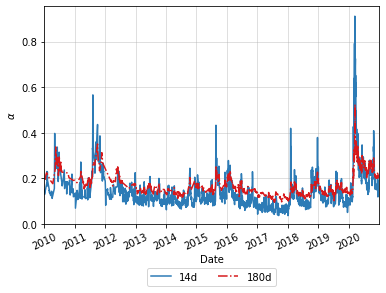

In [23]:
ax = plt.subplot()

plt.plot(short_term['alpha'], color=colors[3])
plt.plot(long_term['alpha'], linestyle='-.', color=colors[0])

years = mdates.YearLocator(1)
months = mdates.MonthLocator(interval=1)

# ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
myFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=25)

plt.xlabel('Date')
plt.ylabel(r'$ \alpha $')
plt.ylim(0, None)

plt.xlim(datetime.datetime(2010,1,1), datetime.datetime(2020,12,31))

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=2)
plt.grid(alpha=.5)

# plt.savefig(save_path + '/historical_alpha.eps', bbox_inches='tight')


## $\rho$

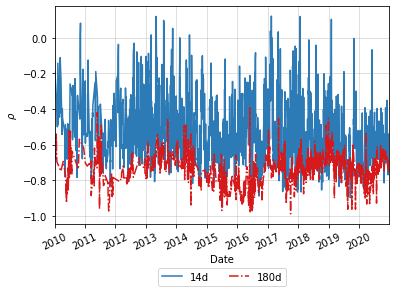

In [26]:
ax = plt.subplot()

plt.plot(short_term['rho'], color=colors[3])
plt.plot(long_term['rho'], linestyle='-.', color=colors[0])

years = mdates.YearLocator(1)
months = mdates.MonthLocator(interval=1)

# ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
myFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=25)

plt.xlim(datetime.datetime(2010,1,1), datetime.datetime(2020,12,31))

plt.xlabel('Date')
plt.ylabel(r'$ \rho $')

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=2)
plt.grid(alpha=.5)

# plt.savefig(save_path + '/historical_rho.eps', bbox_inches='tight')


## $v$

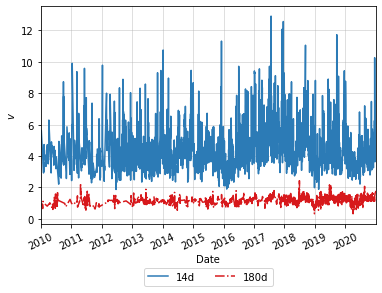

In [28]:
ax = plt.subplot()

plt.plot(short_term['v'], color=colors[3])
plt.plot(long_term['v'], linestyle='-.', color=colors[0])

years = mdates.YearLocator(1)
months = mdates.MonthLocator(interval=1)

# ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
myFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=25)

plt.xlim(datetime.datetime(2010,1,1), datetime.datetime(2020,12,31))

plt.xlabel('Date')
plt.ylabel(r'$ v $')

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=2)
plt.grid(alpha=.5)

# plt.savefig(save_path + '/historical_v.eps', bbox_inches='tight')
